# Exploratory Data Analysis

## Import dependencies

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy.stats import boxcox, yeojohnson, skew
from sklearn.preprocessing import QuantileTransformer, KBinsDiscretizer
import warnings # ignore warnings
warnings.filterwarnings('ignore')

## Import dataset

In [2]:
df = pd.read_csv('../data/customers_100k.csv', sep='|') 

In [3]:
df.head(10)

account_id country_name account_category  \
0  ac6a99474410f1c59c91da3f0cf9cf3f        Tonga         Standard   
1  1cc66628ed41f3db5a55195e93277a04   Costa Rica         Standard   
2  db5f3cdd5629b9591b720b9b7e077df2   Costa Rica         Standard   
3  bebb4028688f519f36ed220855b0a62f   Costa Rica         Standard   
4  507c0bfb67895d773e3f8bd33b861d09   Costa Rica         Standard   
5  b1267a5b953b7267de811510f838172b   Costa Rica         Standard   
6  3315ad169d4d2e9080f1377c44377c7c   Costa Rica         Standard   
7  8ca7b69eda1a06b32e60fff1c6db3b28   Costa Rica         Standard   
8  5bd2eea4e2320b9246b41a8f54fb02d2   Costa Rica              SMB   
9  bbfb03bca60fb0185be3f36d12c99b3f   Costa Rica         Standard   

  bi_account_classification      customer_type    region  sic_code  \
0              Inside Sales           Customer      APAC      7381   
1              Inside Sales           Customer  AMERICAS      5049   
2              Inside Sales           Customer  AMERICAS      7389   
3                  Reseller  End-User Reseller  AMERICAS      8711   
4              Inside Sales           Customer  AMERICAS      6531   
5              Inside Sales           Customer  AMERICAS      5943   
6                  Reseller           Reseller  AMERICAS      7378   
7              Inside Sales           Customer  AMERICAS         1   
8              Inside Sales           Customer  AMERICAS      8111   
9              Inside Sales           Customer  AMERICAS      8731   

   employee_number  revenue_in_eur  number_distinct_active_licenses  ...  \
0                8       1502000.0                                1  ...   
1               11       1814000.0                                1  ...   
2               16      13444000.0                                1  ...   
3               36       7066000.0                                3  ...   
4              312      61054000.0                                2  ...   
5               25       4881000.0                                1  ...   
6               15       3013000.0                                9  ...   
7              717     159214000.0                                1  ...   
8                5        934000.0                                3  ...   
9               22       4308000.0                                2  ...   

  total_connections_12m  total_endpoints_12m  total_devices_12m  \
0                    54                    4                  2   
1                  3385                  158                 51   
2                    12                    2                  2   
3                  1724                  206                 30   
4                  6493                  611                 31   
5                   583                    3                  5   
6                  2181                  311                  7   
7                  2415                  244                  4   
8                 22037                 3766               1311   
9                  4064                  672                 15   

   last_invoice_date_created current_sales_channel age_customer  \
0        2023-11-23 01:57:47               Webshop            6   
1        2023-10-07 19:35:11               Webshop            1   
2        2023-12-02 02:03:05               Webshop            2   
3        2023-10-25 23:32:46          Inside Sales            7   
4        2023-11-17 04:16:51          Inside Sales           10   
5        2023-08-21 01:11:38               Webshop            5   
6        2023-09-28 04:27:43              Reseller            7   
7        2023-12-22 06:27:18                 Other           12   
8        2023-09-22 01:48:17          Inside Sales            9   
9        2023-12-20 01:21:26          Inside Sales           15   

   number_renewals  account_value_in_eur  billings_ltm_prorated  \
0                5               2532.84                 466.47   
1                0               1298.15       

## Variable Description

* **account_id**: Masked customer ID in TeamViewer.
* **country_name**: Name of the country.
* **account_category**: Characterization of the account.
* **bi_account_classification**: Internal classification of the account.
* **customer_type**: Type of customer.
* **region**: AMS, EMEA or APAC.
* **sic_code**: 4-digit code that describes the customer's business type.
* **employee_number**: Number of employees of the company.
* **revenue_in_eur**: Reported revenue generated by the company in EUR.
* **number_distinct_active_licenses**: Total Number of distinct and active licenses.
* **major_edition**: Type of license purchased.
* **total_connections_12m**: Total number of connections in the last 12 months.
* **total_endpoints_12m**: Total number of endpoints connected in the last 12 months.
* **total_devices_12m**: Total number of devices connected in the last 12 months.
* **last_invoice_date_created**: Date of the last invoice.
* **current_sales_channel**: Sales Channel used.
* **age_customer**: Age of the customer with TV.
* **number_renewals**: Number of times the customer renewed the contract.
* **account_value_in_eur**: Customer value for TV in EUR.
* **billings_ltm_prorated**: Annual contract value for the last 12 months.
* **business_model**: Subscription or Perpetual.

## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   account_id                       100000 non-null  object 
 1   country_name                     100000 non-null  object 
 2   account_category                 100000 non-null  object 
 3   bi_account_classification        100000 non-null  object 
 4   customer_type                    100000 non-null  object 
 5   region                           100000 non-null  object 
 6   sic_code                         100000 non-null  int64  
 7   employee_number                  100000 non-null  int64  
 8   revenue_in_eur                   100000 non-null  float64
 9   number_distinct_active_licenses  100000 non-null  int64  
 10  major_edition                    100000 non-null  object 
 11  total_connections_12m            100000 non-null  int64  
 12  tot

In [5]:
df.describe()

sic_code  employee_number  revenue_in_eur  \
count  100000.000000    100000.000000    1.000000e+05   
mean     5879.682920       297.198880    1.253197e+08   
std      2280.167339      4463.491202    2.653859e+09   
min         1.000000         1.000000    1.000000e+00   
25%      4731.000000         3.000000    2.248878e+05   
50%      6512.000000         8.000000    1.143722e+06   
75%      7389.000000        30.000000    5.288708e+06   
max      9999.000000    543000.000000    4.408149e+11   

       number_distinct_active_licenses  total_connections_12m  \
count                     100000.00000           1.000000e+05   
mean                           1.64531           1.834676e+03   
std                            1.29076           9.158201e+03   
min                            1.00000           1.000000e+00   
25%                            1.00000           1.140000e+02   
50%                            1.00000           4.160000e+02   
75%                            2.00000           1.377000e+03   
max                          155.00000           1.140462e+06   

       total_endpoints_12m  total_devices_12m   age_customer  number_renewals  \
count        100000.000000      100000.000000  100000.000000    100000.000000   
mean            187.814590          21.411450       6.422390         3.781310   
std             751.854495         117.205407       3.901829         3.359553   
min               1.000000           1.000000       1.000000         0.000000   
25%               6.000000           2.000000       3.000000         2.000000   
50%              30.000000           5.000000       5.000000         4.000000   
75%             138.000000          15.000000       9.000000         5.000000   
max           78107.000000       13094.000000      18.000000       212.000000   

       account_value_in_eur  billings_ltm_prorated  
count          1.000000e+05          100000.000000  
mean           5.449461e+03            1087.345111  
std            1.737684e+04            4750.485586  
min            0.000000e+00               1.000000  
25%            1.275970e+03             349.710000  
50%            2.483385e+03             520.500000  
75%            6.218025e+03            1199.000000  
max            2.352140e+06          694803.410000

## Data Cleaning

In [6]:
df.isnull().sum()

account_id                         0
country_name                       0
account_category                   0
bi_account_classification          0
customer_type                      0
region                             0
sic_code                           0
employee_number                    0
revenue_in_eur                     0
number_distinct_active_licenses    0
major_edition                      0
total_connections_12m              0
total_endpoints_12m                0
total_devices_12m                  0
last_invoice_date_created          0
current_sales_channel              0
age_customer                       0
number_renewals                    0
account_value_in_eur               0
billings_ltm_prorated              0
business_model                     0
dtype: int64

Fortunately, this dataset contains no missing values. We’ll use visualization methods to look for trends and outliers in our collected data.

In [7]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [account_id, country_name, account_category, bi_account_classification, customer_type, region, sic_code, employee_number, revenue_in_eur, number_distinct_active_licenses, major_edition, total_connections_12m, total_endpoints_12m, total_devices_12m, last_invoice_date_created, current_sales_channel, age_customer, number_renewals, account_value_in_eur, billings_ltm_prorated, business_model]
Index: []

[0 rows x 21 columns]

As the above result, there are no duplicated values in our dataset.

## Data Preprocessing

### Add SIC Code & Description

In [8]:
sic_code_df = pd.read_excel('../data/sic_4_digit_codes.xls')
sic_code_df

Code Value                                   Description
0            111                                         Wheat
1            112                                          Rice
2            115                                          Corn
3            116                                      Soybeans
4            119                              Cash grains, nec
...          ...                                           ...
1000        9651  Regulation, miscellaneous commercial sectors
1001        9661                 Space research and technology
1002        9711                             National security
1003        9721                         International affairs
1004        9999                Nonclassifiable establishments

[1005 rows x 2 columns]

In [9]:
# Merge df and sic_code_df and add the 'description' column to df
df = df.merge(sic_code_df, left_on='sic_code', right_on='Code Value', how='left')
df

account_id   country_name account_category  \
0      ac6a99474410f1c59c91da3f0cf9cf3f          Tonga         Standard   
1      1cc66628ed41f3db5a55195e93277a04     Costa Rica         Standard   
2      db5f3cdd5629b9591b720b9b7e077df2     Costa Rica         Standard   
3      bebb4028688f519f36ed220855b0a62f     Costa Rica         Standard   
4      507c0bfb67895d773e3f8bd33b861d09     Costa Rica         Standard   
...                                 ...            ...              ...   
99995  7396a9c9504211ce55073ace6c8d4913  United States         Standard   
99996  8d680e3cfa74cc08e8268254e99e1f48  United States         Standard   
99997  6449e4ad632b62eae4f4f7708d257a9e  United States         Standard   
99998  973778c47a7242c7e150f5ac7172dc10  United States         Standard   
99999  f99a7b398712c7f0903213d17a256316  United States         Standard   

      bi_account_classification      customer_type    region  sic_code  \
0                  Inside Sales           Customer      APAC      7381   
1                  Inside Sales           Customer  AMERICAS      5049   
2                  Inside Sales           Customer  AMERICAS      7389   
3                      Reseller  End-User Reseller  AMERICAS      8711   
4                  Inside Sales           Customer  AMERICAS      6531   
...                         ...                ...       ...       ...   
99995              Inside Sales           Customer  AMERICAS      8071   
99996              Inside Sales           Customer  AMERICAS      7379   
99997              Inside Sales           Customer  AMERICAS      8111   
99998              Inside Sales           Customer  AMERICAS      6531   
99999              Inside Sales           Customer  AMERICAS      3949   

       employee_number  revenue_in_eur  number_distinct_active_licenses  ...  \
0                    8       1502000.0                                1  ...   
1                   11       1814000.0                                1  ...   
2                   16      13444000.0                                1  ...   
3                   36       7066000.0                                3  ...   
4                  312      61054000.0                                2  ...   
...                ...             ...                              ...  ...   
99995               50       9450000.0                                2  ...   
99996               12       2336000.0                                3  ...   
99997               27       5229000.0                                1  ...   
99998                4        352000.0                                1  ...   
99999              260      50580000.0                                3  ...   

      total_devices_12m  last_invoice_date_created  current_sales_channel  \
0                     2        2023-11-23 01:57:47                Webshop   
1                    51        2023-10-07 19:35:11                Webshop   
2                     2        2023-12-02 02:03:05                Webshop   
3                    30        2023-10-25 23:32:46           Inside Sales   
4                    31        2023-11-17 04:16:51           Inside Sales   
...                 ...                        ...                    ...   
99995                 4        2023-07-13 11:17:28                Webshop   
99996                 7        2023-08-29 02:50:05           Inside Sales   
99997                 2        2023-11-10 00:54:15                Webshop   
99998                 7        2023-10-24 03:22:08                Webshop   
99999                24        2023-07-31 02:55:26           Inside Sales   

       age_customer number_renewals account_value_in_eur  \
0                 6               5              2532.84   
1                 1               0              1298.15   
2                 2               1               155.83   
3                 7               5              7550.16   
4                10               1              4688

In [10]:
# Rename the 'description' column to 'code_description'
df.rename(columns={'Description': 'sic_code_description'}, inplace=True)

#### Add Industry

In [11]:
# Define a dictionary to map SIC code ranges to major industry groups
major_groups = {
    range(1, 10): 'Agriculture, Forestry, and Fishing',
    range(10, 15): 'Mining',
    range(15, 18): 'Construction',
    range(20, 40): 'Manufacturing',
    range(40, 50): 'Transportation, Communications, Electric, Gas, and Sanitary Services',
    range(50, 52): 'Wholesale Trade',
    range(52, 60): 'Retail Trade',
    range(60, 68): 'Finance, Insurance, and Real Estate',
    range(70, 90): 'Services',
    range(90, 100): 'Public Administration'
}

# Map SIC code ranges to major industry group descriptions
def map_to_major_group(sic_code):
    for group_range, description in major_groups.items():
        if sic_code // 100 in group_range:
            return description
    return 'Unknown'

In [12]:
df['industry'] = df['sic_code'].apply(map_to_major_group)

In [13]:
df.head(10)

account_id country_name account_category  \
0  ac6a99474410f1c59c91da3f0cf9cf3f        Tonga         Standard   
1  1cc66628ed41f3db5a55195e93277a04   Costa Rica         Standard   
2  db5f3cdd5629b9591b720b9b7e077df2   Costa Rica         Standard   
3  bebb4028688f519f36ed220855b0a62f   Costa Rica         Standard   
4  507c0bfb67895d773e3f8bd33b861d09   Costa Rica         Standard   
5  b1267a5b953b7267de811510f838172b   Costa Rica         Standard   
6  3315ad169d4d2e9080f1377c44377c7c   Costa Rica         Standard   
7  8ca7b69eda1a06b32e60fff1c6db3b28   Costa Rica         Standard   
8  5bd2eea4e2320b9246b41a8f54fb02d2   Costa Rica              SMB   
9  bbfb03bca60fb0185be3f36d12c99b3f   Costa Rica         Standard   

  bi_account_classification      customer_type    region  sic_code  \
0              Inside Sales           Customer      APAC      7381   
1              Inside Sales           Customer  AMERICAS      5049   
2              Inside Sales           Customer  AMERICAS      7389   
3                  Reseller  End-User Reseller  AMERICAS      8711   
4              Inside Sales           Customer  AMERICAS      6531   
5              Inside Sales           Customer  AMERICAS      5943   
6                  Reseller           Reseller  AMERICAS      7378   
7              Inside Sales           Customer  AMERICAS         1   
8              Inside Sales           Customer  AMERICAS      8111   
9              Inside Sales           Customer  AMERICAS      8731   

   employee_number  revenue_in_eur  number_distinct_active_licenses  ...  \
0                8       1502000.0                                1  ...   
1               11       1814000.0                                1  ...   
2               16      13444000.0                                1  ...   
3               36       7066000.0                                3  ...   
4              312      61054000.0                                2  ...   
5               25       4881000.0                                1  ...   
6               15       3013000.0                                9  ...   
7              717     159214000.0                                1  ...   
8                5        934000.0                                3  ...   
9               22       4308000.0                                2  ...   

  last_invoice_date_created  current_sales_channel  age_customer  \
0       2023-11-23 01:57:47                Webshop             6   
1       2023-10-07 19:35:11                Webshop             1   
2       2023-12-02 02:03:05                Webshop             2   
3       2023-10-25 23:32:46           Inside Sales             7   
4       2023-11-17 04:16:51           Inside Sales            10   
5       2023-08-21 01:11:38                Webshop             5   
6       2023-09-28 04:27:43               Reseller             7   
7       2023-12-22 06:27:18                  Other            12   
8       2023-09-22 01:48:17           Inside Sales             9   
9       2023-12-20 01:21:26           Inside Sales            15   

   number_renewals account_value_in_eur billings_ltm_prorated  business_model  \
0                5              2532.84                466.47               S   
1                0              1298.15                972.57               S   
2                1               155.83                 76.69               S   
3                5              7550.16               1088.58               S   
4                1              4688.33               1593.70               S   
5                4               971.96                198.63               S   
6               15             66581.67                837.31               S   
7                6              2986.48                211.88               S   
8                4             46022.86               9129.48               S   
9                4             12584.99               1308.89               S   

   Code Value   

## Data Visualization

In order to optimize the visualization process, we will be taken a 10k sample out of the dataset.

In [14]:
sample_df = df.sample(n=10000, random_state=400)

### Univariate Analysis

#### Numerical features

In [15]:
# Exclude the sic_codes
exclude_cols = ['sic_code', 'Code Value']

# Select columns based on data type (float64 and int64)
numerical_cols = sample_df.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_cols)

# Convert numerical_cols to a list and append 'account_id' to it
selected_cols = ['account_id'] + list(numerical_cols)

# Select the desired columns from the DataFrame
numerical_df = sample_df[selected_cols]

In [16]:
numerical_df.columns

Index(['account_id', 'account_value_in_eur', 'age_customer',
       'billings_ltm_prorated', 'employee_number',
       'number_distinct_active_licenses', 'number_renewals', 'revenue_in_eur',
       'total_connections_12m', 'total_devices_12m', 'total_endpoints_12m'],
      dtype='object')

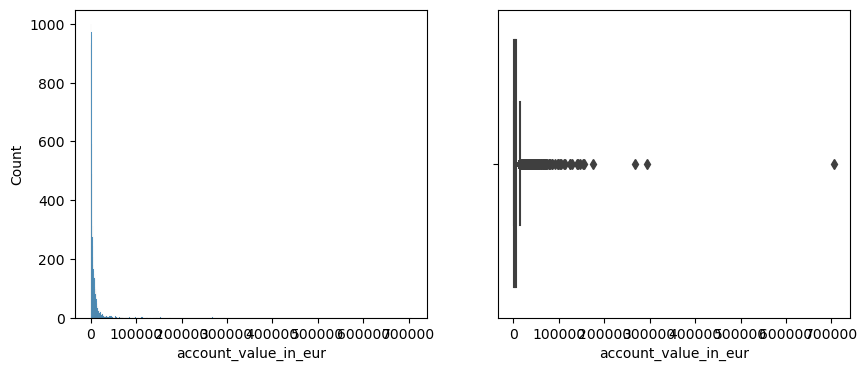

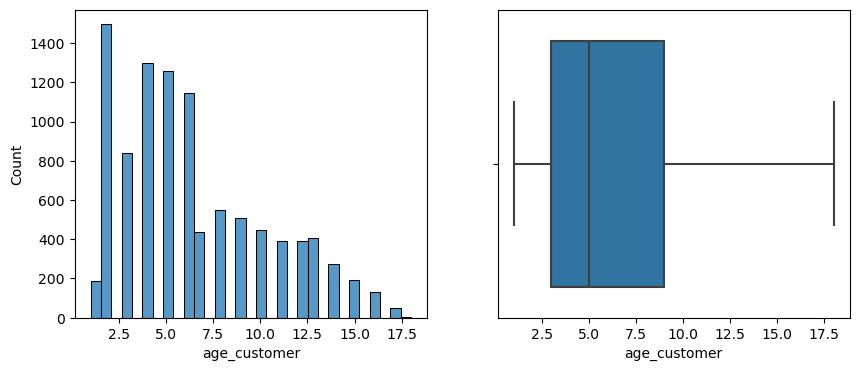

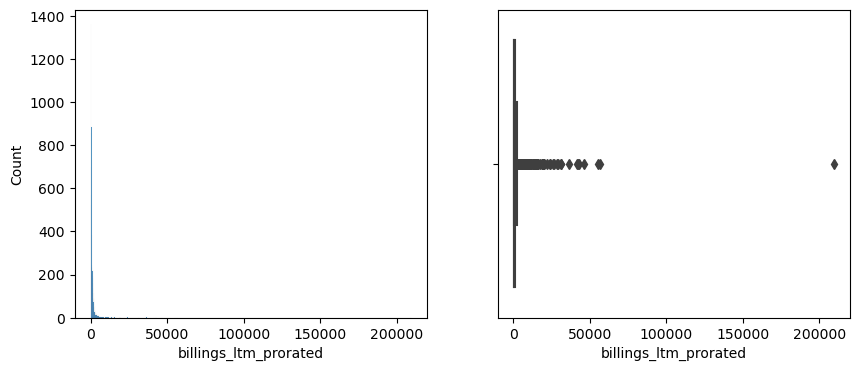

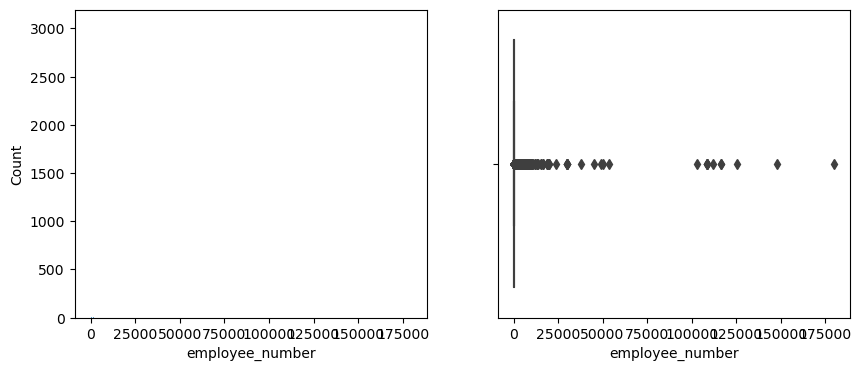

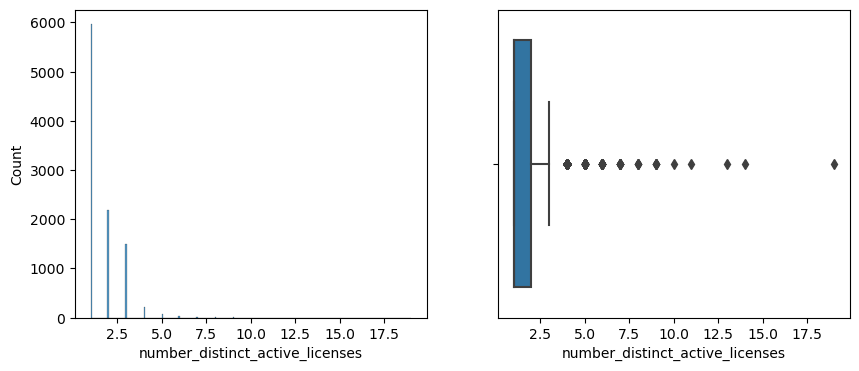

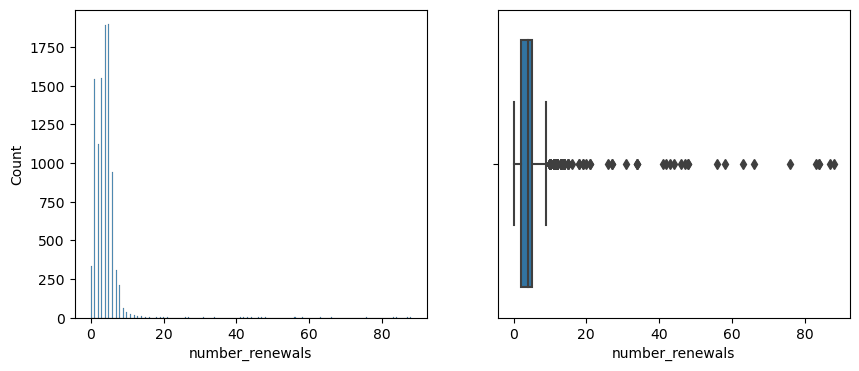

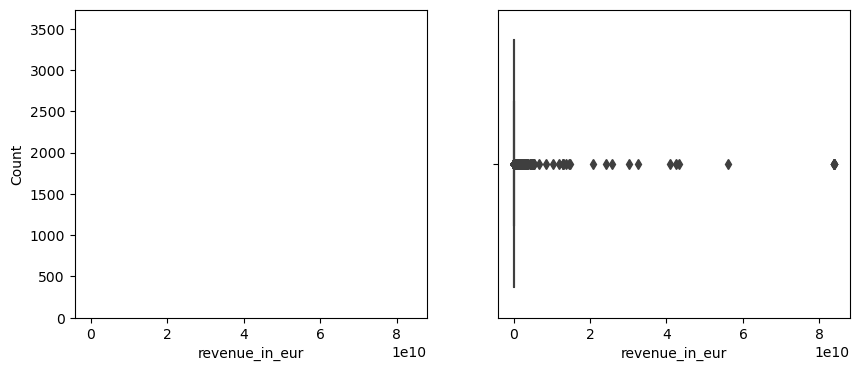

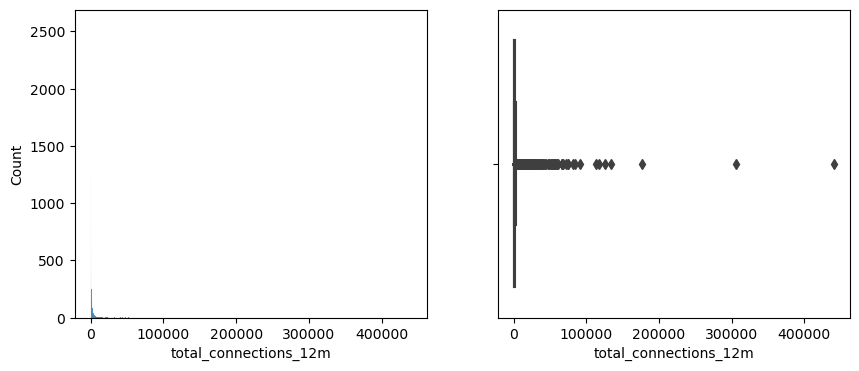

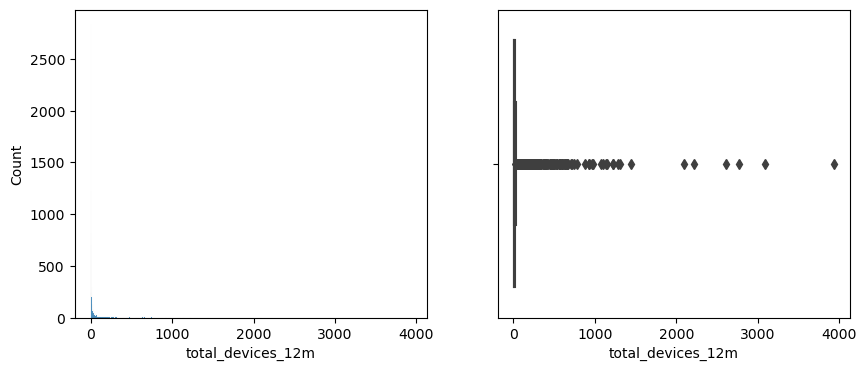

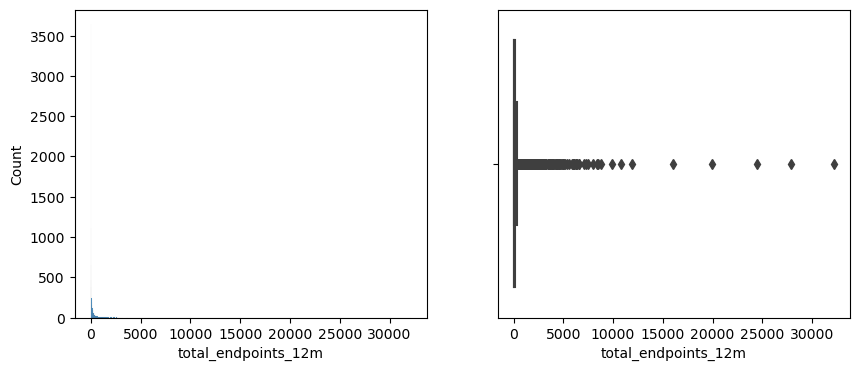

In [17]:
# Visualize the distribution of each variable
for col in numerical_cols:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=numerical_df, x=col, ax=ax[0])
    sns.boxplot(data=numerical_df, x=col, ax=ax[1])

As we can see from the above histogram of our dataset, all columns have a **right-skewed distribution**, which means that wee need to perform a scaling transformation in order to have a more normal distributed data in all columns. For that we will evaluate which transformation better suits our data.

In [18]:
# Exclude the 'id' column from the DataFrame
numerical_df_no_id = numerical_df.drop(columns=['account_id'])

fig = px.scatter_matrix(numerical_df_no_id,
                        width=1200,
                        height=1600)
fig.show()

##### Scaling

In [19]:
def apply_scaling_transformations(df, column_name):
  """
  Applies square root, log1p, box-cox, yeo-johnson and quantile transformations to a column.

  Args:
      df (pandas.DataFrame): The dataframe containing the column to transform.
      column_name (str): The name of the numerical column to transform.

  Returns:
      pandas.DataFrame: The original dataframe with new transformed columns.
  """
  
  data = df[column_name].copy()

  # Apply transformations with prefix
  df["sqrt_" + column_name] = np.sqrt(data)
  df["log1p_" + column_name] = np.log1p(data)
  df["boxcox_" + column_name] = boxcox(data + 1)[0]  # Add 1 to avoid negative values
  df["yeojohnson_" + column_name] = yeojohnson(data)[0]
  
  quantile_transformer = QuantileTransformer(output_distribution="normal", random_state=0)
  df["quantile_" + column_name] = quantile_transformer.fit_transform(data.values.reshape(-1, 1)).flatten()

  return df

In [20]:
for col in numerical_cols:
    apply_scaling_transformations(numerical_df, col)
    apply_scaling_transformations(numerical_df_no_id, col)

In [21]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 37042 to 84791
Data columns (total 61 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   account_id                                  10000 non-null  object 
 1   account_value_in_eur                        10000 non-null  float64
 2   age_customer                                10000 non-null  int64  
 3   billings_ltm_prorated                       10000 non-null  float64
 4   employee_number                             10000 non-null  int64  
 5   number_distinct_active_licenses             10000 non-null  int64  
 6   number_renewals                             10000 non-null  int64  
 7   revenue_in_eur                              10000 non-null  float64
 8   total_connections_12m                       10000 non-null  int64  
 9   total_devices_12m                           10000 non-null  int64  
 10  total_

In [22]:
numerical_df_no_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 37042 to 84791
Data columns (total 60 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   account_value_in_eur                        10000 non-null  float64
 1   age_customer                                10000 non-null  int64  
 2   billings_ltm_prorated                       10000 non-null  float64
 3   employee_number                             10000 non-null  int64  
 4   number_distinct_active_licenses             10000 non-null  int64  
 5   number_renewals                             10000 non-null  int64  
 6   revenue_in_eur                              10000 non-null  float64
 7   total_connections_12m                       10000 non-null  int64  
 8   total_devices_12m                           10000 non-null  int64  
 9   total_endpoints_12m                         10000 non-null  int64  
 10  sqrt_a

In [23]:
def plot_transformations(df, column_name):
  """
  Plots the distribution of the original column and its various transformations.

  Args:
      df (pandas.DataFrame): The DataFrame containing the column to transform.
      column_name (str): The name of the numerical column to plot the transformations for.
  """
  
  trans_df = df.copy()  # Create a copy to avoid modifying original data

  # Get list of transformation column names (assuming suffix)
  trans_columns = [col for col in trans_df.columns if col.endswith(column_name)]

  # Create a subplot grid
  fig, axes = plt.subplots(2, 3, figsize=(18, 15))

  # Flatten the axes array for easier indexing
  axes = axes.flatten()

  # Plot Original Distribution
  sns.histplot(data=trans_df, x=column_name, kde=True, bins=30, color='skyblue', ax=axes[0])
  axes[0].set_title(f'Original {column_name} Distribution (Skew: {trans_df[column_name].skew():.5f})')
  axes[0].set_xlabel('Original Values')
  axes[0].set_ylabel('Frequency')

  # Loop through transformation columns and plot each
  for i, col in enumerate(trans_columns[1:]):
    sns.histplot(data=trans_df, x=col, kde=True, bins=30, ax=axes[i+1])
    transformation_name = col.split("_")[0]  # Extract transformation name from column
    axes[i+1].set_title(f'{transformation_name} {column_name} (Skew: {trans_df[col].skew():.5f})')
    axes[i+1].set_xlabel(f'{transformation_name} Values')
    axes[i+1].set_ylabel('Frequency')

  plt.tight_layout(pad=4.0)
  plt.show()

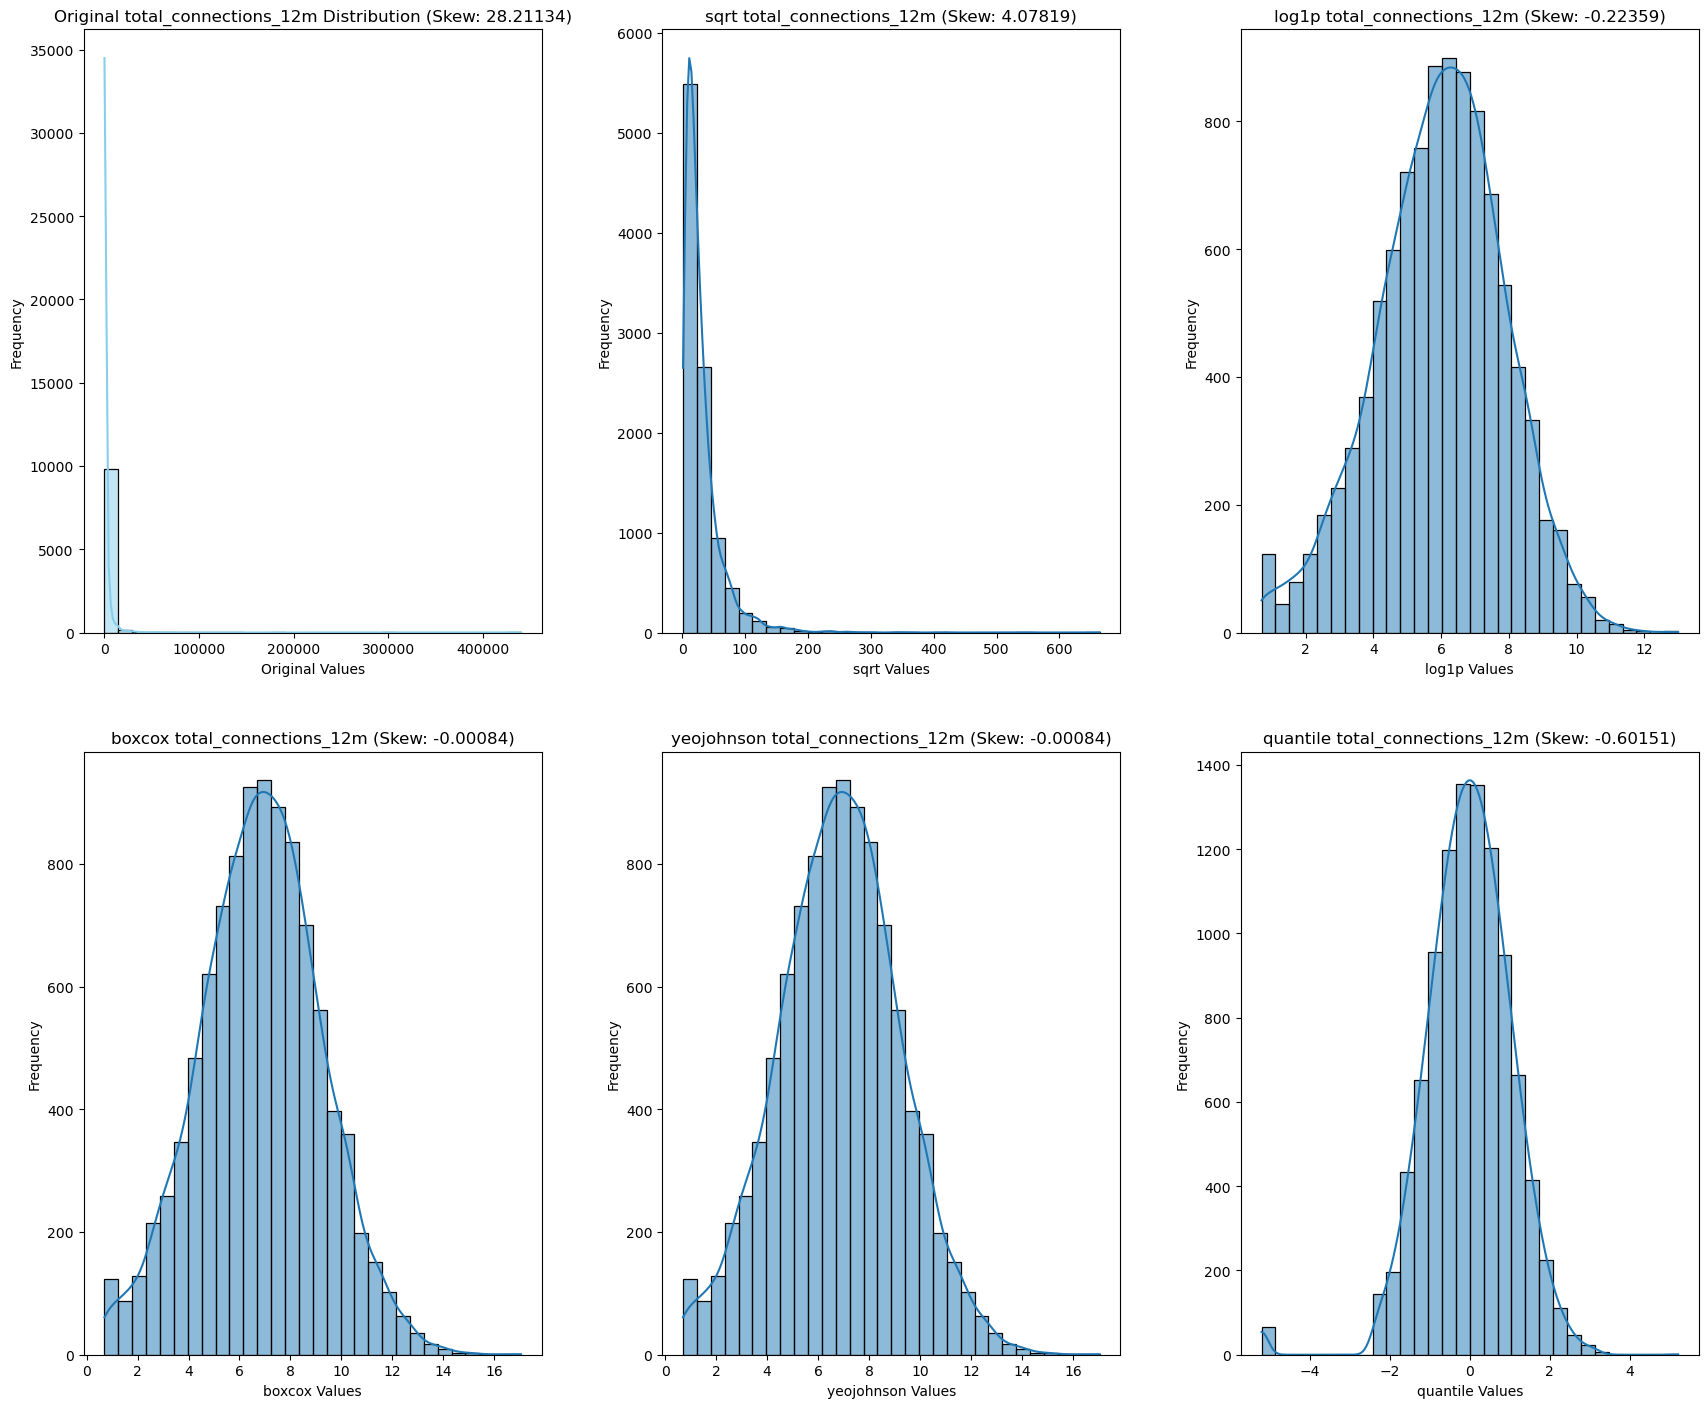

In [24]:
plot_transformations(numerical_df, "total_connections_12m")

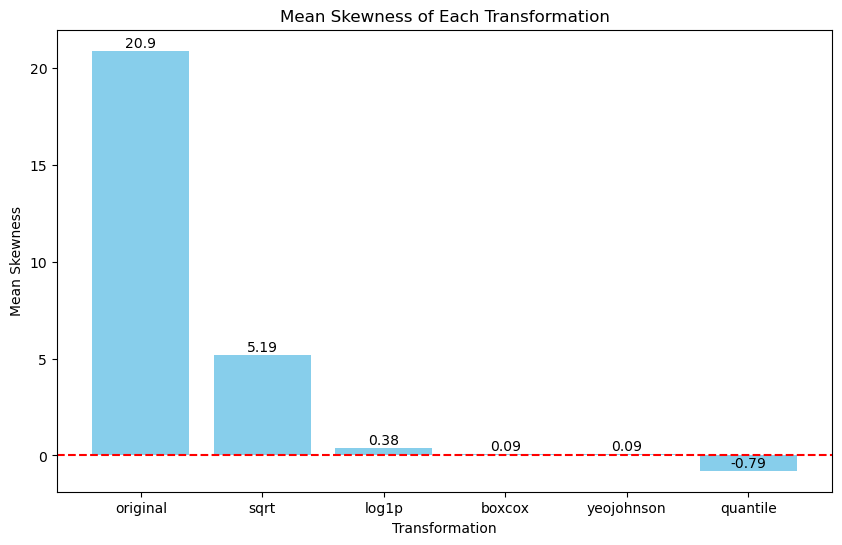

The best transformation based on mean skewness is: yeojohnson.


In [25]:
# Add original skewness to the dictionary
transformations = ["sqrt", "log1p", "boxcox", "yeojohnson", "quantile"]
original_columns = [column for column in numerical_df_no_id.columns if not any(column.startswith(prefix) for prefix in transformations)]
original_skewness = {column: skew(numerical_df_no_id[column]) for column in original_columns}
skewness_dict = {'original': list(original_skewness.values())}

# Compute skewness for each transformed column
for trans in transformations:
    for column_name in numerical_df_no_id.columns:
        if column_name.startswith(trans):
            if trans not in skewness_dict:
                skewness_dict[trans] = []
            skewness_dict[trans].append(skew(numerical_df_no_id[column_name]))

# Calculate mean skewness for each transformation
mean_skewness = {trans: np.mean(skew_values) for trans, skew_values in skewness_dict.items()}

# Plot the mean skewness
transformations = list(mean_skewness.keys())
mean_skew_values = list(mean_skewness.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(transformations, mean_skew_values, color='skyblue')
plt.xlabel('Transformation')
plt.ylabel('Mean Skewness')
plt.title('Mean Skewness of Each Transformation')
plt.axhline(y=0, color='r', linestyle='--')

# Add skew values above the bars
for bar, skew_value in zip(bars, mean_skew_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(skew_value, 2), ha='center', va='bottom')

plt.show()

# Determine the best transformation based on mean skewness closest to zero
best_transformation = min(mean_skewness, key=lambda k: abs(mean_skewness[k]))
print(f"The best transformation based on mean skewness is: {best_transformation}.")

Since the algorithm with closest average skewness to 0 is the Box-Cox Transformation, we'll now check if the variables still have outliers.

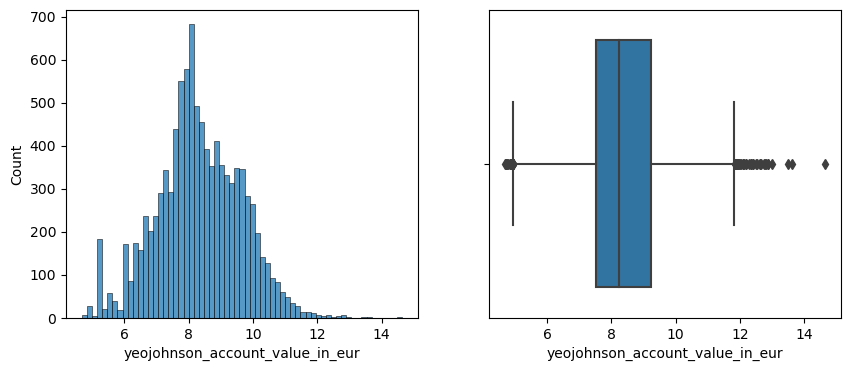

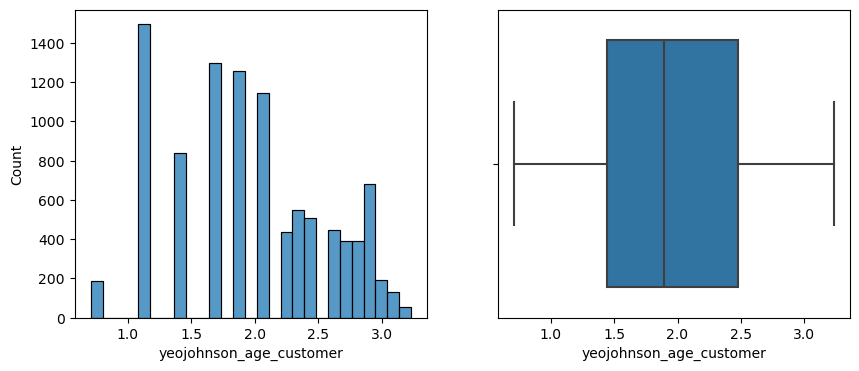

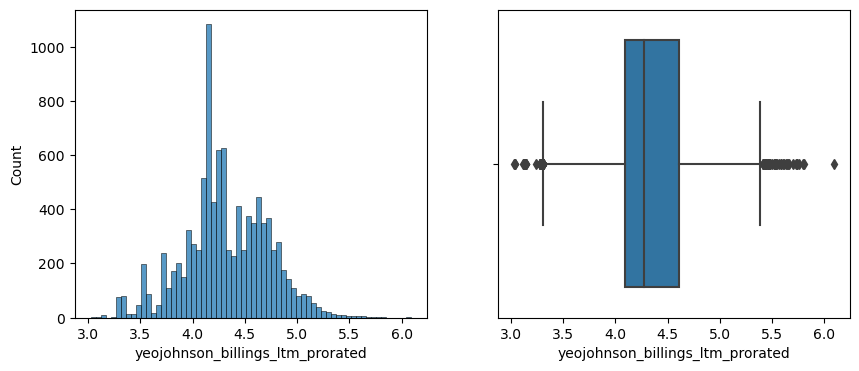

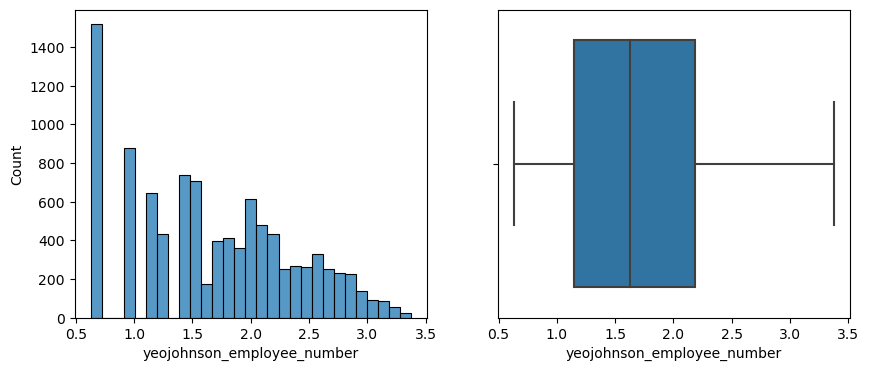

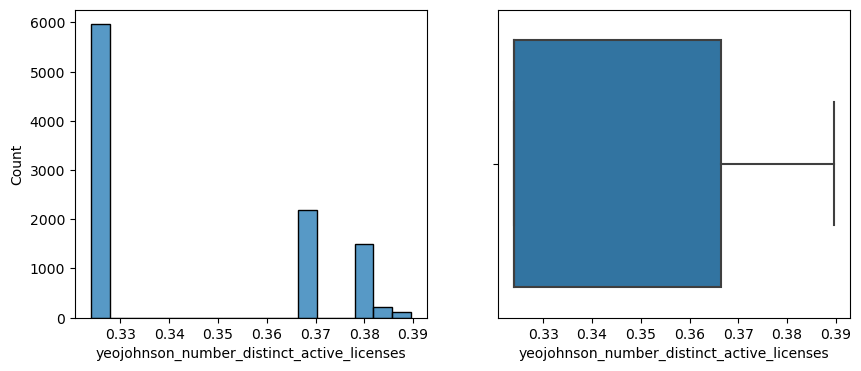

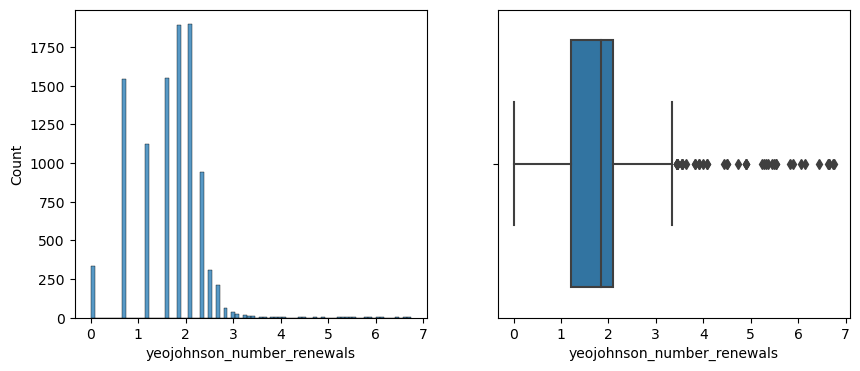

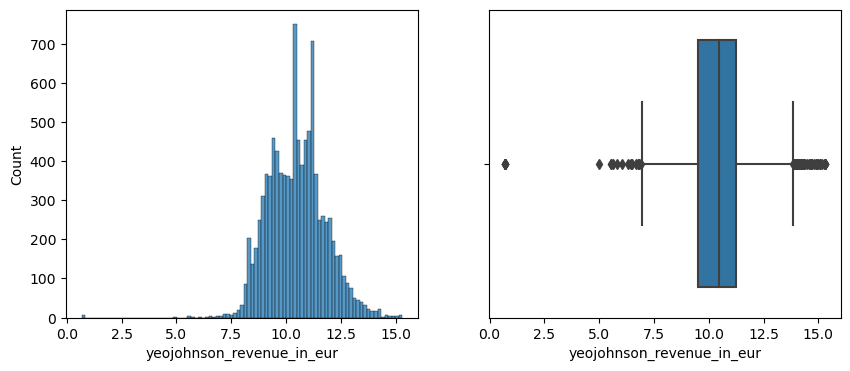

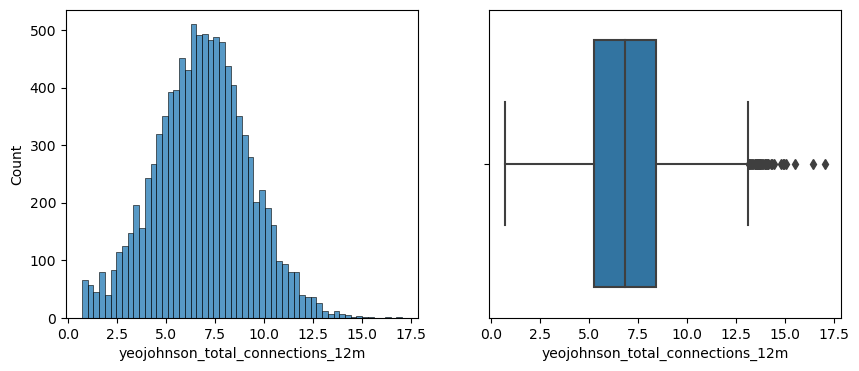

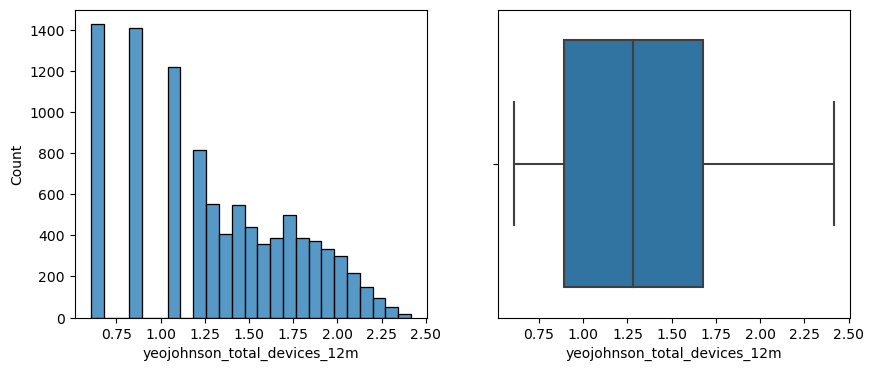

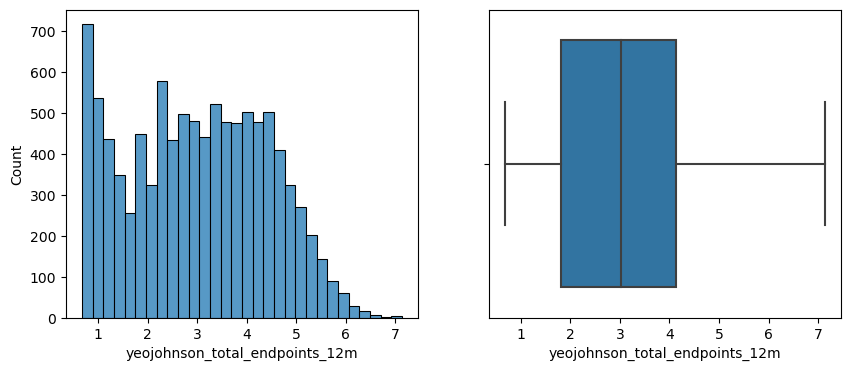

In [26]:
# Get list of the best transformation columns (assuming prefix)
prefix = best_transformation + '_'
best_columns = [col for col in numerical_df_no_id.columns if col.startswith(prefix)]

for col in best_columns:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=numerical_df_no_id, x=col, ax=ax[0])
    sns.boxplot(data=numerical_df_no_id, x=col, ax=ax[1])

In [27]:
# Extract best columns as a DataFrame
best_df = numerical_df[best_columns]

In [28]:
fig = px.scatter_matrix(best_df,
                        width=1200,
                        height=1600)
fig.show()

In [29]:
best_df.head(10)

yeojohnson_account_value_in_eur  yeojohnson_age_customer  \
37042                         6.800258                 1.692618   
13256                         6.369532                 1.136957   
21131                         8.448504                 2.068371   
71796                         8.268387                 1.895249   
23655                         7.990637                 2.068371   
53108                         8.308019                 1.895249   
55617                         8.835762                 2.585640   
99220                         5.220307                 1.136957   
44986                         6.952853                 1.136957   
92623                        10.649180                 2.585640   

       yeojohnson_billings_ltm_prorated  yeojohnson_employee_number  \
37042                          3.746771                    0.628544   
13256                          3.931534                    2.257485   
21131                          4.127273                    0.628544   
71796                          4.304791                    1.490938   
23655                          4.142287                    2.437186   
53108                          4.304875                    1.490938   
55617                          4.554625                    0.942242   
99220                          3.320273                    0.942242   
44986                          4.142287                    1.629632   
92623                          5.096955                    2.195481   

       yeojohnson_number_distinct_active_licenses  yeojohnson_number_renewals  \
37042                                    0.323922                    1.564229   
13256                                    0.323922                    0.735858   
21131                                    0.323922                    2.496741   
71796                                    0.323922                    1.852465   
23655                                    0.323922                    2.096267   
53108                                    0.323922                    1.852465   
55617                                    0.366492                    1.852465   
99220                                    0.323922                    0.735858   
44986                                    0.323922                    0.735858   
92623                                    0.378633                    2.308407   

       yeojohnson_revenue_in_eur  yeojohnson_total_connections_12m  \
37042                   9.471535                          5.845285   
13256                  11.119836                          5.687356   
21131                   8.490339                          7.410089   
71796                  10.473033                          2.701264   
23655                  11.974713                          8.260351   
53108                  10.468812                          6.456835   
55617                   9.604454                          8.522039   
99220                   9.502452                          7.282021   
44986                  10.066480                          7.795199   
92623                  10.847808                          8.409750   

       yeojohnson_total_devices_12m  yeojohnson_total_endpoints_12m  
37042                      1.065102                        1.053220  
13256                      1.280573                        3.209196  
21131                      1.353778                        2.817508  
71796                      0.889674                        0.674890  
23655                      1.280573                        3.965440  
53108                      0.889674                        2.387087  
55617                      1.656425                        4.464186  
99220                      1.065102                        1.920797  
44986                      0.889674                        1.513273  
92623                      1.463892                        4.598691

In order to enhance the performance of machine learning models, scaling seems not to be the solution. the previous models don't assist us in handling outliers. In order to do that, we find the best solution to be discretization. Also known as binning, is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals or bins that cover the range of values in the variable. Each interval represents a category or label, and the continuous values are then assigned to their corresponding bins. By putting values into bins, discretization can assist in handling outliers.

##### Discretization

**Equal-Frequency Binning**

This method divides the values into (quantile) intervals containing the almost same number of values with different bin widths. It can handle outliers as well as improve the value spread by creating a uniform distribution.

> non-uniform quantization yielding intervals such that for each feature the number of occurrences in each interval is the same leading to uniform distribution, and thus maximum entropy; for this reason, this technique is also named maximum entropy quantization.

In [30]:
def apply_equal_frequency_discretization(df, cols, num_bins=4):
  """
  Discretize columns in a dataframe using equal-frequency discretization.

  Args:
      df (pandas.DataFrame): The dataframe to discretize.
      cols (list): The list of columns to discretize.
      num_bins (int, optional): The number of quantiles to use for discretization. 
                                Defaults to 4.
  Returns:
      pandas.DataFrame: The dataframe with discretized columns.
  """
  
  if not isinstance(df, pd.DataFrame):
        raise TypeError("df must be a pandas DataFrame")
        
  if not isinstance(cols, list) or not all(isinstance(col, str) for col in cols):
        raise TypeError("cols must be a list of strings")
    
  if not isinstance(num_bins, int) or num_bins <= 0:
        raise ValueError("num_bins must be a positive integer")

  for col in cols:
    if col not in df.columns:
       raise ValueError(f"Column '{col}' does not exist in the dataframe")

    try:
        df[col + '_bin'], _ = pd.qcut(df[col], q=num_bins, labels=False, retbins=True, duplicates='drop')
        df[col + '_bin'] = df[col + '_bin'] + 1  # Adjust bins to start from 1
    except ValueError as e:
        raise ValueError(f"Error while binning column '{col}': {e}")
    
  return df

vgx*8n7b{IWgR2-fbYA 
         
         
dPqYGk^^0R73C|&)TP6T2C36i

In [31]:
apply_equal_frequency_discretization(numerical_df, best_df, 4)

account_id  account_value_in_eur  age_customer  \
37042  05a80002ff55c3583aab19a250c0abf5                685.80             4   
13256  82255f04c58e9a325b6425f6fe692e8e                460.02             2   
21131  51a73157b0f8105be4f217c919529d21               3100.52             6   
71796  f6433bd9ea1014acb65cdced733083ad               2632.97             5   
23655  23ae2ace7515d9e724166e1a86ec524b               2044.98             6   
...                                 ...                   ...           ...   
92069  183454fffa3c9b12bad713070d76158e                475.20             4   
19949  7c575c1835538802871e008b602b968f                425.40             2   
67989  061b5520e62b110f9c510959b92d3364                717.60             2   
69662  cebfe4760ff0a011dc6d48102057e86b                789.60             2   
84791  1329617c51c078b741dc6ae019b1cdee               2485.76             1   

       billings_ltm_prorated  employee_number  \
37042                 173.00                1   
13256                 251.64               37   
21131                 382.00                1   
71796                 569.27                6   
23655                 394.80               65   
...                      ...              ...   
92069                 118.80               24   
19949                 201.07               25   
67989                 358.80               10   
69662                 394.80               20   
84791                2267.85                2   

       number_distinct_active_licenses  number_renewals  revenue_in_eur  \
37042                                1                3        199242.0   
13256                                1                1       3946000.0   
21131                                1                7         39848.0   
71796                                1                4       1167000.0   
23655                                1                5      21947000.0   
...                                ...              ...             ...   
92069                                1                3       5345531.0   
19949                                1                1      19284000.0   
67989                                1                1        989693.0   
69662                                1                1        647344.0   
84791                                2                0         65138.0   

       total_connections_12m  total_devices_12m  ...  \
37042                    190                  3  ...   
13256                    167                  5  ...   
21131                    657                  6  ...   
71796                     12                  2  ...   
23655                   1256                  5  ...   
...                      ...                ...  ...   
92069                      4                  1  ...   
19949                    295                 24  ...   
67989                    313                  2  ...   
69662                     29                  3  ...   
84791                   2571                 63  ...   

       boxcox_account_value_in_eur_bin  boxcox_age_customer_bin  \
37042                                1                        2   
13256                                1                        1   
21131                                3                        3   
71796                                3                        2   
23655                                2                        3   
...                                ...                      ...   
92069                                1                        2   
19949                                1                        1   
67989                                1                        1   
69662                                1                        1   
84791                                2                        1   

       boxcox_billings_ltm_prorated_bin  boxcox_employee_number_bin  \
37042                                 1  

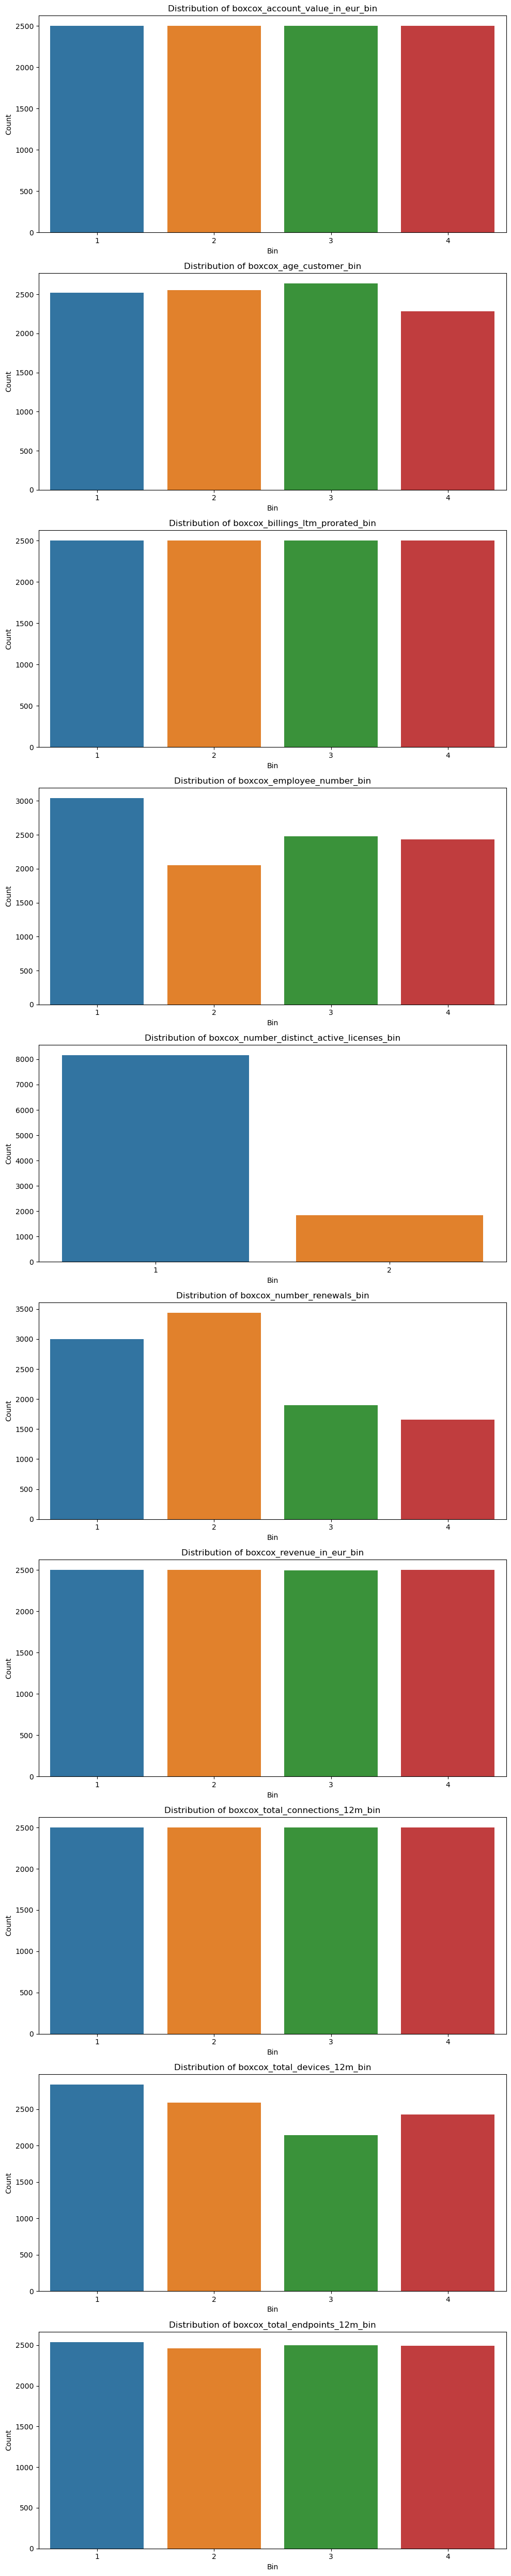

In [32]:
# Prepare data for plotting
cols_to_plot = [col for col in numerical_df.columns if col.endswith('_bin')]
data_to_plot = numerical_df[cols_to_plot]

# Plot the binned columns
num_plots = len(cols_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 5))

if num_plots == 1:
    axes = [axes]

for i, col in enumerate(cols_to_plot):
    bin_col = col
    sns.countplot(data=data_to_plot, x=bin_col, ax=axes[i])
    axes[i].set_title(f'Distribution of {bin_col}')
    axes[i].set_xlabel('Bin')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [33]:
numerical_df.columns

Index(['account_id', 'account_value_in_eur', 'age_customer',
       'billings_ltm_prorated', 'employee_number',
       'number_distinct_active_licenses', 'number_renewals', 'revenue_in_eur',
       'total_connections_12m', 'total_devices_12m', 'total_endpoints_12m',
       'sqrt_account_value_in_eur', 'log1p_account_value_in_eur',
       'boxcox_account_value_in_eur', 'yeojohnson_account_value_in_eur',
       'quantile_account_value_in_eur', 'sqrt_age_customer',
       'log1p_age_customer', 'boxcox_age_customer', 'yeojohnson_age_customer',
       'quantile_age_customer', 'sqrt_billings_ltm_prorated',
       'log1p_billings_ltm_prorated', 'boxcox_billings_ltm_prorated',
       'yeojohnson_billings_ltm_prorated', 'quantile_billings_ltm_prorated',
       'sqrt_employee_number', 'log1p_employee_number',
       'boxcox_employee_number', 'yeojohnson_employee_number',
       'quantile_employee_number', 'sqrt_number_distinct_active_licenses',
       'log1p_number_distinct_active_licenses',
   

In [34]:
num_columns = ['account_id','boxcox_account_value_in_eur_bin', 'boxcox_age_customer_bin', 'boxcox_billings_ltm_prorated_bin',
               'boxcox_employee_number_bin', 'boxcox_number_distinct_active_licenses_bin', 'boxcox_number_renewals_bin',
               'boxcox_revenue_in_eur_bin', 'boxcox_total_connections_12m_bin', 'boxcox_total_devices_12m_bin',
               'boxcox_total_endpoints_12m_bin']

numerical_df = numerical_df[num_columns]

In [35]:
numerical_df.head(10)

account_id  boxcox_account_value_in_eur_bin  \
37042  05a80002ff55c3583aab19a250c0abf5                                1   
13256  82255f04c58e9a325b6425f6fe692e8e                                1   
21131  51a73157b0f8105be4f217c919529d21                                3   
71796  f6433bd9ea1014acb65cdced733083ad                                3   
23655  23ae2ace7515d9e724166e1a86ec524b                                2   
53108  392aa316a91e5c4178102767f75602b6                                3   
55617  89ab527676406b6c33954244da2aeddd                                3   
99220  48832f8fc071df9402fda47363a76c54                                1   
44986  9c7c7f243ee15d177b0728025e8e4536                                1   
92623  d92ffff0a747fc65a87ba4a7eb1b3e44                                4   

       boxcox_age_customer_bin  boxcox_billings_ltm_prorated_bin  \
37042                        2                                 1   
13256                        1                                 1   
21131                        3                                 2   
71796                        2                                 3   
23655                        3                                 2   
53108                        2                                 3   
55617                        4                                 3   
99220                        1                                 1   
44986                        1                                 2   
92623                        4                                 4   

       boxcox_employee_number_bin  boxcox_number_distinct_active_licenses_bin  \
37042                           1                                           1   
13256                           4                                           1   
21131                           1                                           1   
71796                           2                                           1   
23655                           4                                           1   
53108                           2                                           1   
55617                           1                                           1   
99220                           1                                           1   
44986                           2                                           1   
92623                           4                                           2   

       boxcox_number_renewals_bin  boxcox_revenue_in_eur_bin  \
37042                           2                          1   
13256                           1                          3   
21131                           4                          1   
71796                           2                          3   
23655                           3                          4   
53108                           2                          3   
55617                           2                          2   
99220                           1                          1   
44986                           1                          2   
92623                           4                          3   

       boxcox_total_connections_12m_bin  boxcox_total_devices_12m_bin  \
37042                                 2                             2   
13256                                 2                             2   
21131                                 3                             3   
71796                                 1                             1   
23655                                 3                             2   
53108                                 2                             1   
55617                                 4                             3   
99220                                 3                             2   
44986                                 3                             1   
92623                                 4                             3   

       boxcox_total_endpoints_12m_bin  
37

#### Categorical features

In [36]:
# Exclude the sic_code_description
exclude_col = ['sic_code_description']

# Select columns based on data type (object)
categorical_cols = sample_df.select_dtypes(include=['object']).columns.difference(exclude_col)

# Select the desired columns from the DataFrame
categorical_df = sample_df[categorical_cols]

In [37]:
categorical_df.head(10)

account_category                        account_id  \
37042         Standard  05a80002ff55c3583aab19a250c0abf5   
13256         Standard  82255f04c58e9a325b6425f6fe692e8e   
21131         Standard  51a73157b0f8105be4f217c919529d21   
71796         Standard  f6433bd9ea1014acb65cdced733083ad   
23655         Standard  23ae2ace7515d9e724166e1a86ec524b   
53108         Standard  392aa316a91e5c4178102767f75602b6   
55617         Standard  89ab527676406b6c33954244da2aeddd   
99220         Standard  48832f8fc071df9402fda47363a76c54   
44986         Standard  9c7c7f243ee15d177b0728025e8e4536   
92623         Standard  d92ffff0a747fc65a87ba4a7eb1b3e44   

      bi_account_classification business_model   country_name  \
37042              Inside Sales              S         France   
13256              Inside Sales              S      Argentina   
21131              Inside Sales              S         France   
71796              Inside Sales              S  United States   
23655              Inside Sales              S        Austria   
53108              Inside Sales              S  United States   
55617              Inside Sales              S        Germany   
99220              Inside Sales              S  United States   
44986              Inside Sales              S        Belgium   
92623              Inside Sales              S    Netherlands   

      current_sales_channel customer_type  \
37042               Webshop      Customer   
13256               Webshop      Customer   
21131               Webshop      Customer   
71796               Webshop      Customer   
23655               Webshop      Customer   
53108               Webshop      Customer   
55617          Inside Sales      Customer   
99220               Webshop      Customer   
44986               Webshop      Customer   
92623          Inside Sales      Customer   

                                                industry  \
37042                                       Retail Trade   
13256                                       Retail Trade   
21131                Finance, Insurance, and Real Estate   
71796                                      Manufacturing   
23655                                       Retail Trade   
53108                                           Services   
55617                                       Retail Trade   
99220  Transportation, Communications, Electric, Gas,...   
44986                 Agriculture, Forestry, and Fishing   
92623                Finance, Insurance, and Real Estate   

      last_invoice_date_created  major_edition    region  
37042       2023-10-10 01:52:16  Remote Access      EMEA  
13256       2023-11-14 03:02:03       Business  AMERICAS  
21131       2023-10-06 01:28:35       Business      EMEA  
71796       2023-09-14 01:45:42       Business  AMERICAS  
23655       2023-09-19 01:39:19       Business      EMEA  
53108       2023-09-06 03:29:16       Business  AMERICAS  
55617       2023-11-10 01:23:30      Corporate      EMEA  
99220       2023-12-08 03:29:33  Remote Access  AMERICAS  
44986       2023-12-09 03:08:47       Business      EMEA  
92623       2023-08-22 01:13:37      Corporate      EMEA

In [38]:
categorical_df.describe(include='object')

account_category                        account_id  \
count             10000                             10000   
unique                5                             10000   
top            Standard  05a80002ff55c3583aab19a250c0abf5   
freq               9875                                 1   

       bi_account_classification business_model   country_name  \
count                      10000          10000          10000   
unique                         4              2            119   
top                 Inside Sales              S  United States   
freq                        9366           9998            833   

       current_sales_channel customer_type  industry  \
count                  10000         10000     10000   
unique                     6             3        11   
top                  Webshop      Customer  Services   
freq                    4819          9450      4397   

       last_invoice_date_created major_edition region  
count                      10000         10000  10000  
unique                      9901             5      3  
top          2023-09-22 02:00:00      Business   EMEA  
freq                           4          4182   7558

Compare the original dataframe to the sample one, in order to check if there is missing categories,

In [39]:
df.describe(include='object')

account_id   country_name account_category  \
count                             100000         100000           100000   
unique                            100000            182                5   
top     ac6a99474410f1c59c91da3f0cf9cf3f  United States         Standard   
freq                                   1           8164            98856   

       bi_account_classification customer_type  region major_edition  \
count                     100000        100000  100000        100000   
unique                         5             4       3             6   
top                 Inside Sales      Customer    EMEA      Business   
freq                       93667         94509   75663         41914   

       last_invoice_date_created current_sales_channel business_model  \
count                     100000                100000         100000   
unique                     95946                     6              2   
top          2023-11-30 01:00:00               Webshop              S   
freq                          24                 48959          99995   

                        sic_code_description  industry  
count                                  98953    100000  
unique                                   939        11  
top     Custom computer programming services  Services  
freq                                    4780     43728

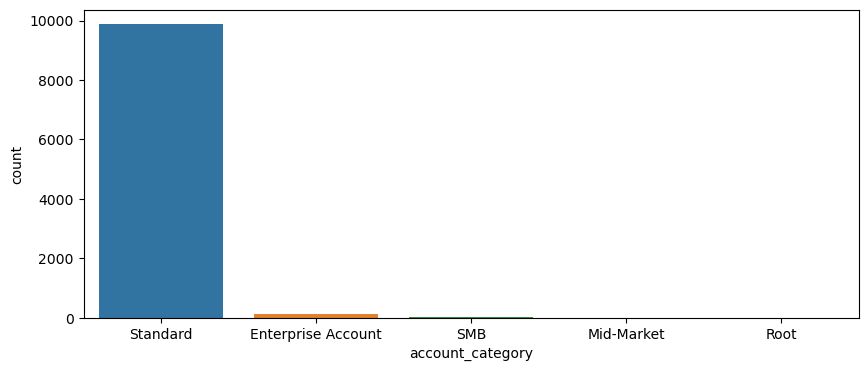

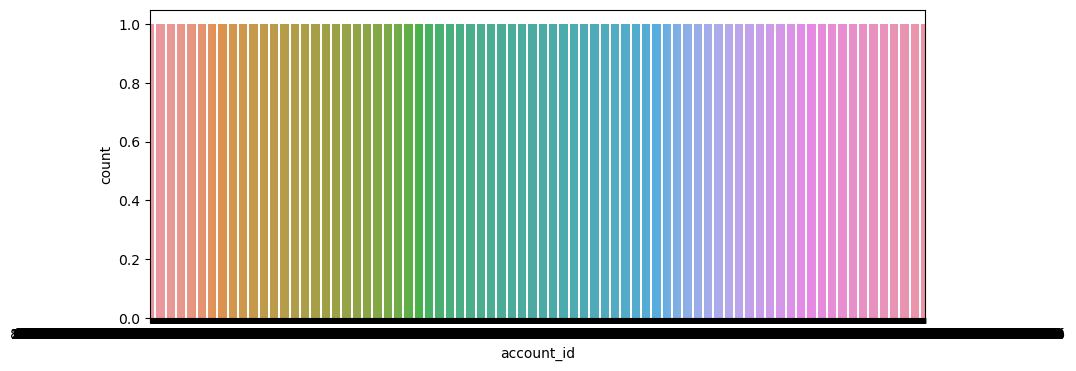

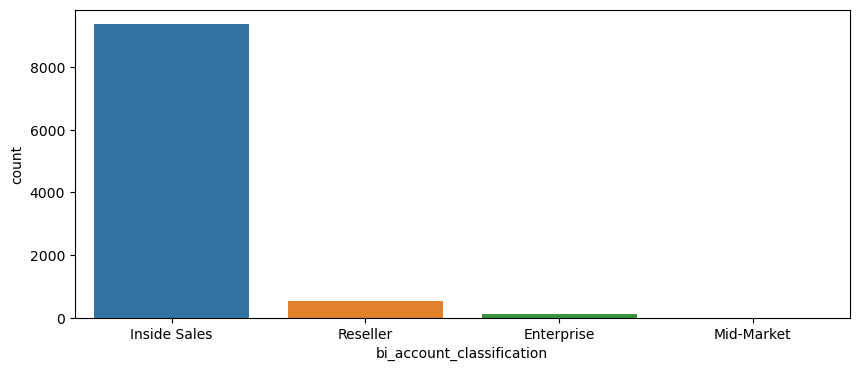

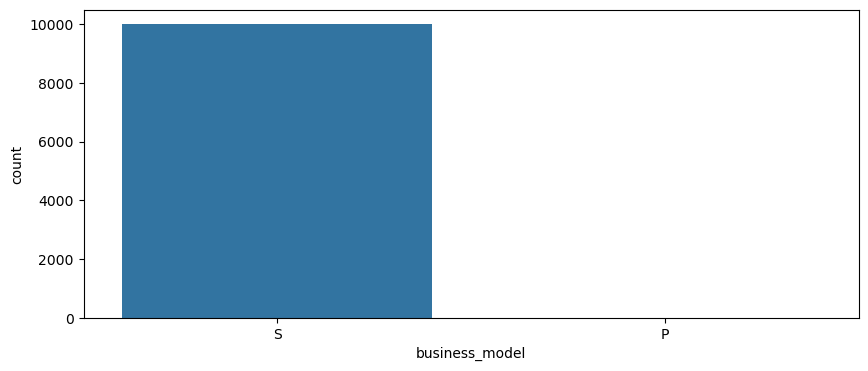

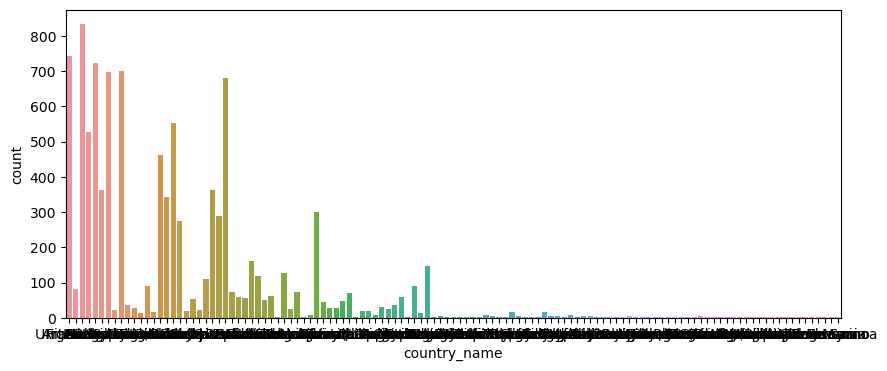

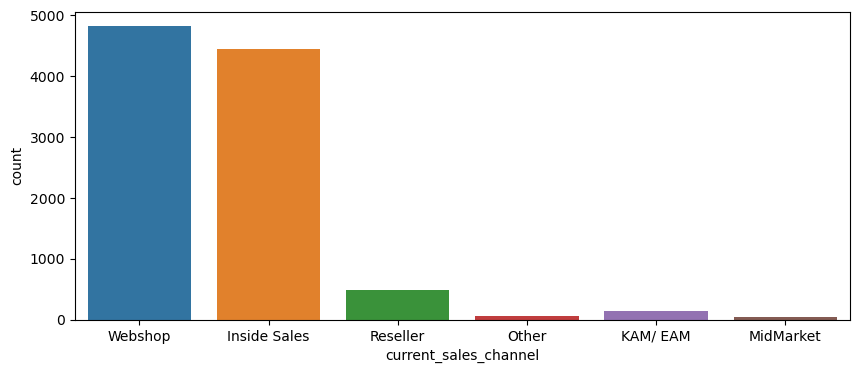

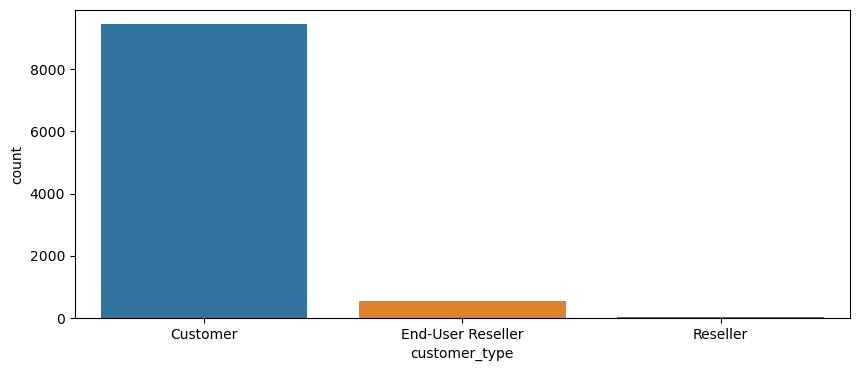

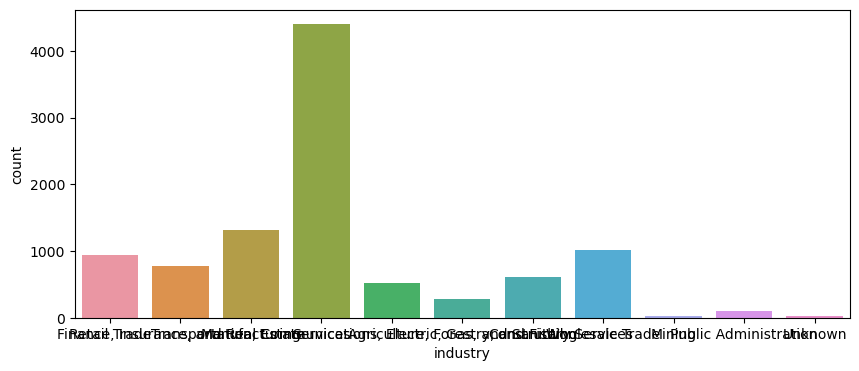

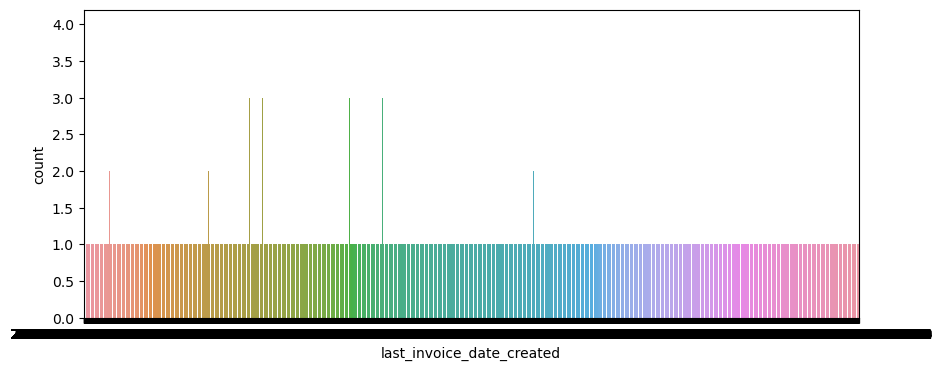

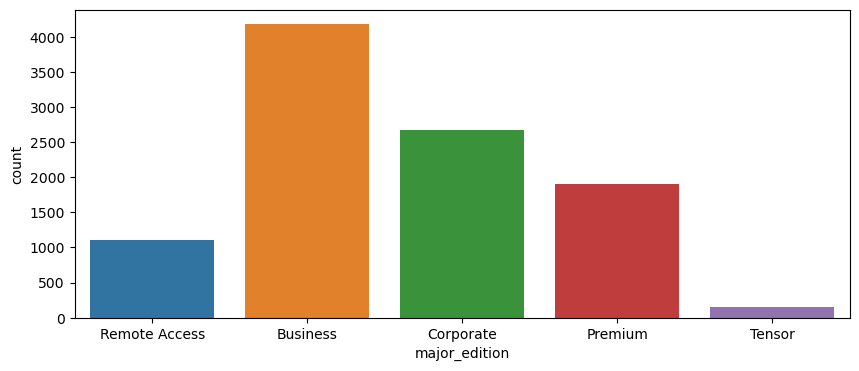

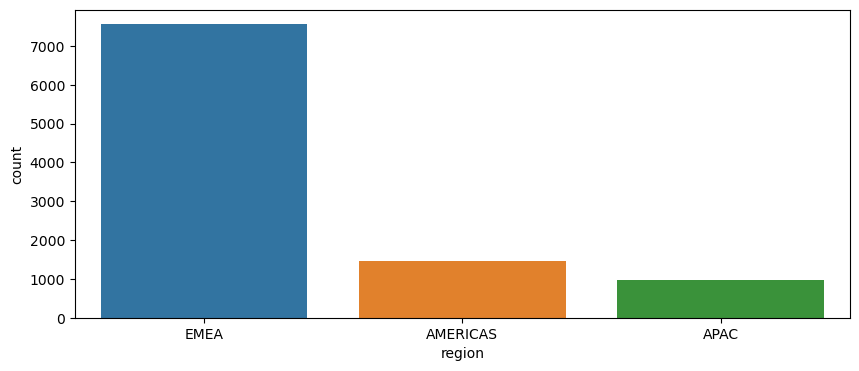

In [40]:
# Visualize the distribution of each variable
for col in categorical_cols:
    fig = plt.subplots(1, 1, figsize=(10,4))
    sns.countplot(data=categorical_df, x=col)

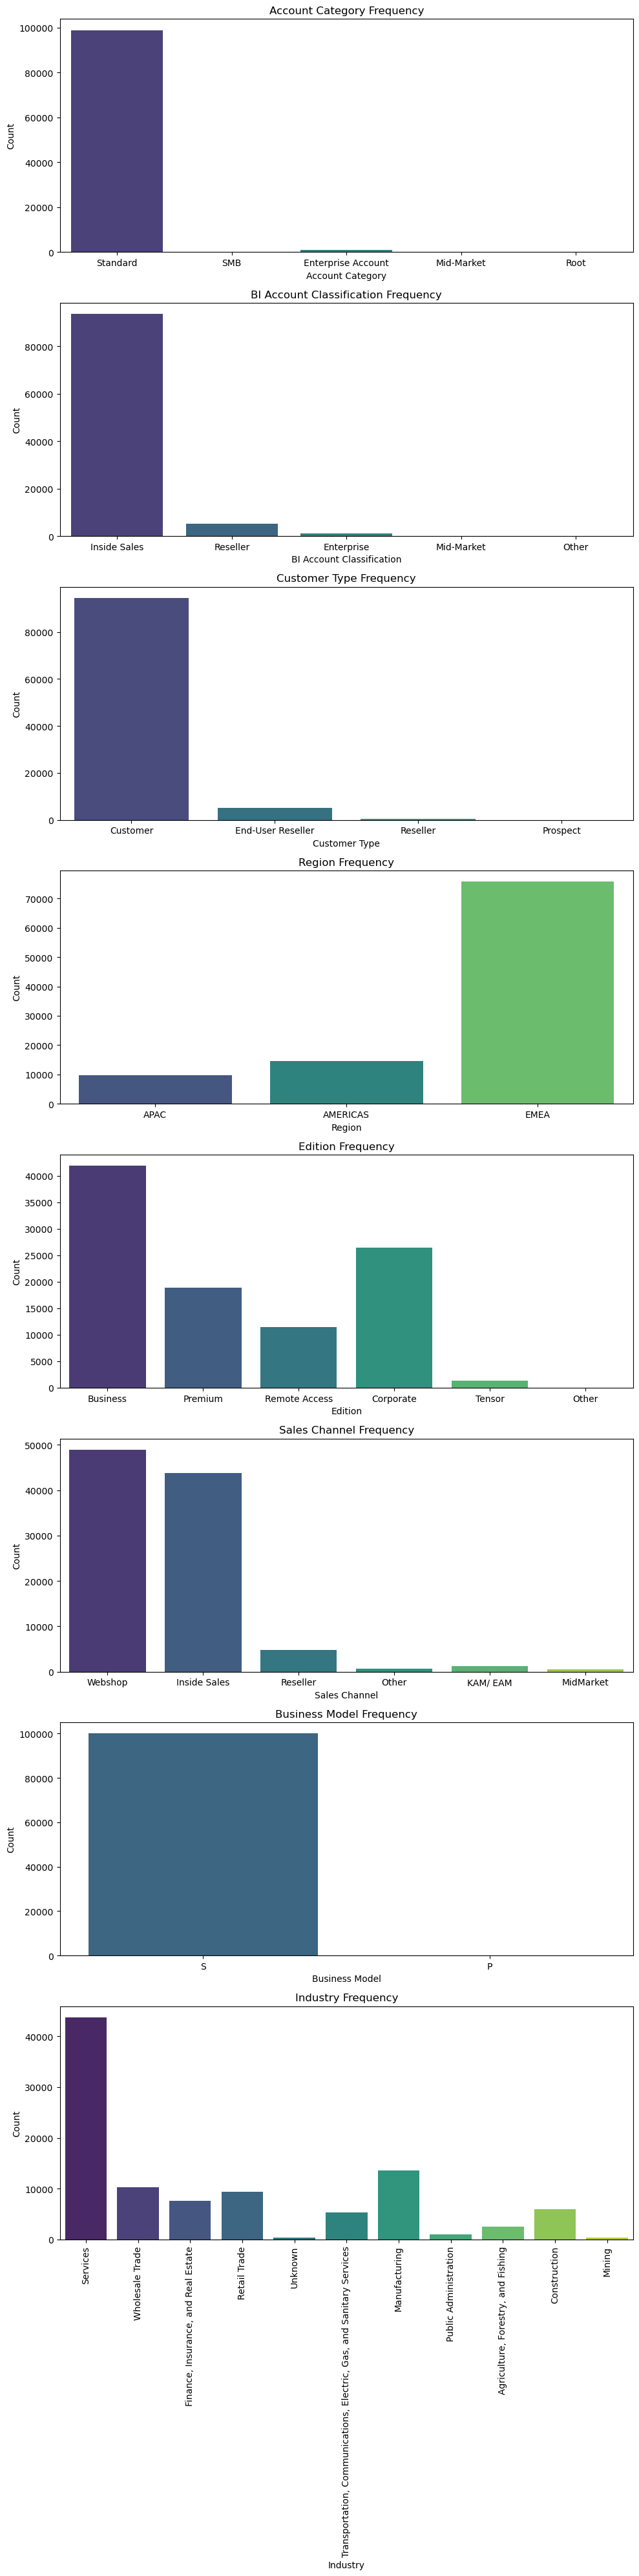

In [41]:
# Create the count plots for each feature
plt.figure(figsize=(10,40))

# Plot for Account Category
plt.subplot(8, 1, 1)
sns.countplot(data=df, x='account_category', palette='viridis')
plt.title('Account Category Frequency')
plt.xlabel('Account Category')
plt.ylabel('Count')

# Plot for BI Account Classification
plt.subplot(8, 1, 2)
sns.countplot(data=df, x='bi_account_classification', palette='viridis')
plt.title('BI Account Classification Frequency')
plt.xlabel('BI Account Classification')
plt.ylabel('Count')

# Plot for Customer Type
plt.subplot(8, 1, 3)
sns.countplot(data=df, x='customer_type', palette='viridis')
plt.title('Customer Type Frequency')
plt.xlabel('Customer Type')
plt.ylabel('Count')

# Plot for Region
plt.subplot(8, 1, 4)
sns.countplot(data=df, x='region', palette='viridis')
plt.title('Region Frequency')
plt.xlabel('Region')
plt.ylabel('Count')

# Plot for Edition
plt.subplot(8, 1, 5)
sns.countplot(data=df, x='major_edition', palette='viridis')
plt.title('Edition Frequency')
plt.xlabel('Edition')
plt.ylabel('Count')

# Plot for Sales Channel
plt.subplot(8, 1, 6)
sns.countplot(data=df, x='current_sales_channel', palette='viridis')
plt.title('Sales Channel Frequency')
plt.xlabel('Sales Channel')
plt.ylabel('Count')

# Plot for Business Model
plt.subplot(8, 1, 7)
sns.countplot(data=df, x='business_model', palette='viridis')
plt.title('Business Model Frequency')
plt.xlabel('Business Model')
plt.ylabel('Count')

# Plot for Business Model
plt.subplot(8, 1, 8)
sns.countplot(data=df, x='industry', palette='viridis')
plt.title('Industry Frequency')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

Since there are columns with that have high-cardinality or centered around just one category, we will create new columns based on those ones in order to reduce cardinality and centralization. Also some of the columns will be discarded due to irrelevance or redundancy. That mapping will be done as follows:

* **Account Category**: DISCARDED.
* **BI Account Classification**: DISCARDED.
* **Customer Type**: DISCARDED.
* **Region**: boolean (EMEA or not EMEA)
* **Edition**: ordinal encoding (1-Remote Access; 2-Business; 3-Premium; 4-Corporate; 5-Tensor; 6-Other) -- Take out Other
* **Sales Channel**: 2 boolean columns (Webshop or not Webshop; Inside Sales or not Inside Sales)
* **Business Model**: DISCARDED.
* **Industry**: One-Hot Encoding (TOP 5 + Others)

##### Feature Engineering

In [42]:
# Create the boolean columns 'is_EMEA', 'is_Webshop' and 'is_InsideSales'
categorical_df['is_EMEA'] = (categorical_df['region'] == 'EMEA').astype(int)
categorical_df['is_Webshop'] = (categorical_df['current_sales_channel'] == 'Webshop').astype(int)
categorical_df['is_InsideSales'] = (categorical_df['current_sales_channel'] == 'Inside Sales').astype(int)

In [43]:
# Define the mapping for ordinal encoding
ordinal_mapping = {'Remote Access': 1, 
                   'Business': 2, 
                   'Premium': 3,
                   'Corporate': 4, 
                   'Tensor': 5,
                   'Other': 6 
                }

# Apply the ordinal encoding to 'major_edition'
categorical_df['edition_order'] = categorical_df['major_edition'].map(ordinal_mapping)

In [44]:
# Determine the top 5 most frequent categories in industry
top5_industries= categorical_df['industry'].value_counts().nlargest(5).index

# One-hot encode the top 5 most frequent industries
one_hot_encoded = pd.get_dummies(categorical_df['industry'].apply(lambda x: x if x in top5_industries else 'Other'), prefix='industry')

# Merge the one-hot encoded columns back to the original DataFrame
categorical_df = pd.concat([categorical_df, one_hot_encoded], axis=1)

In [45]:
categorical_df.head(10)

account_category                        account_id  \
37042         Standard  05a80002ff55c3583aab19a250c0abf5   
13256         Standard  82255f04c58e9a325b6425f6fe692e8e   
21131         Standard  51a73157b0f8105be4f217c919529d21   
71796         Standard  f6433bd9ea1014acb65cdced733083ad   
23655         Standard  23ae2ace7515d9e724166e1a86ec524b   
53108         Standard  392aa316a91e5c4178102767f75602b6   
55617         Standard  89ab527676406b6c33954244da2aeddd   
99220         Standard  48832f8fc071df9402fda47363a76c54   
44986         Standard  9c7c7f243ee15d177b0728025e8e4536   
92623         Standard  d92ffff0a747fc65a87ba4a7eb1b3e44   

      bi_account_classification business_model   country_name  \
37042              Inside Sales              S         France   
13256              Inside Sales              S      Argentina   
21131              Inside Sales              S         France   
71796              Inside Sales              S  United States   
23655              Inside Sales              S        Austria   
53108              Inside Sales              S  United States   
55617              Inside Sales              S        Germany   
99220              Inside Sales              S  United States   
44986              Inside Sales              S        Belgium   
92623              Inside Sales              S    Netherlands   

      current_sales_channel customer_type  \
37042               Webshop      Customer   
13256               Webshop      Customer   
21131               Webshop      Customer   
71796               Webshop      Customer   
23655               Webshop      Customer   
53108               Webshop      Customer   
55617          Inside Sales      Customer   
99220               Webshop      Customer   
44986               Webshop      Customer   
92623          Inside Sales      Customer   

                                                industry  \
37042                                       Retail Trade   
13256                                       Retail Trade   
21131                Finance, Insurance, and Real Estate   
71796                                      Manufacturing   
23655                                       Retail Trade   
53108                                           Services   
55617                                       Retail Trade   
99220  Transportation, Communications, Electric, Gas,...   
44986                 Agriculture, Forestry, and Fishing   
92623                Finance, Insurance, and Real Estate   

      last_invoice_date_created  major_edition  ... is_EMEA  is_Webshop  \
37042       2023-10-10 01:52:16  Remote Access  ...       1           1   
13256       2023-11-14 03:02:03       Business  ...       0           1   
21131       2023-10-06 01:28:35       Business  ...       1           1   
71796       2023-09-14 01:45:42       Business  ...       0           1   
23655       2023-09-19 01:39:19       Business  ...       1           1   
53108       2023-09-06 03:29:16       Business  ...       0           1   
55617       2023-11-10 01:23:30      Corporate  ...       1           0   
99220       2023-12-08 03:29:33  Remote Access  ...       0           1   
44986       2023-12-09 03:08:47       Business  ...       1           1   
92623       2023-08-22 01:13:37      Corporate  ...       1           0   

       is_InsideSales  edition_order  \
37042               0              1   
13256               0              2   
21131               0              2   
71796               0              2   
23655               0              2   
53108               0              2   
55617               1              4   
99220               0              1   
44986               0              2   
92623               1              4   

       industry_Finance, Insurance, and Real Estate  industry_Manufacturing  \
37042                                             0                       0   
13256                                          

In [46]:
categorical_df.columns

Index(['account_category', 'account_id', 'bi_account_classification',
       'business_model', 'country_name', 'current_sales_channel',
       'customer_type', 'industry', 'last_invoice_date_created',
       'major_edition', 'region', 'is_EMEA', 'is_Webshop', 'is_InsideSales',
       'edition_order', 'industry_Finance, Insurance, and Real Estate',
       'industry_Manufacturing', 'industry_Other', 'industry_Retail Trade',
       'industry_Services', 'industry_Wholesale Trade'],
      dtype='object')

In [47]:
cat_columns = ['account_id', 'last_invoice_date_created', 'is_EMEA', 'is_Webshop', 'is_InsideSales', 
               'edition_order', 'industry_Finance, Insurance, and Real Estate', 'industry_Manufacturing', 
               'industry_Other', 'industry_Retail Trade', 'industry_Services', 'industry_Wholesale Trade']

categorical_df = categorical_df[cat_columns]

# Rename industry columns
rename_columns = {
    'industry_Finance, Insurance, and Real Estate': 'is_industry_FinanceInsuranceRealEstate',
    'industry_Manufacturing': 'is_industry_Manufacturing',
    'industry_Other': 'is_industry_Other',
    'industry_Retail Trade': 'is_industry_RetailTrade',
    'industry_Services': 'is_industry_Services',
    'industry_Wholesale Trade': 'is_industry_WholesaleTrade'
}

categorical_df.rename(columns=rename_columns, inplace=True)

In [48]:
categorical_df.head(10)

account_id last_invoice_date_created  is_EMEA  \
37042  05a80002ff55c3583aab19a250c0abf5       2023-10-10 01:52:16        1   
13256  82255f04c58e9a325b6425f6fe692e8e       2023-11-14 03:02:03        0   
21131  51a73157b0f8105be4f217c919529d21       2023-10-06 01:28:35        1   
71796  f6433bd9ea1014acb65cdced733083ad       2023-09-14 01:45:42        0   
23655  23ae2ace7515d9e724166e1a86ec524b       2023-09-19 01:39:19        1   
53108  392aa316a91e5c4178102767f75602b6       2023-09-06 03:29:16        0   
55617  89ab527676406b6c33954244da2aeddd       2023-11-10 01:23:30        1   
99220  48832f8fc071df9402fda47363a76c54       2023-12-08 03:29:33        0   
44986  9c7c7f243ee15d177b0728025e8e4536       2023-12-09 03:08:47        1   
92623  d92ffff0a747fc65a87ba4a7eb1b3e44       2023-08-22 01:13:37        1   

       is_Webshop  is_InsideSales  edition_order  \
37042           1               0              1   
13256           1               0              2   
21131           1               0              2   
71796           1               0              2   
23655           1               0              2   
53108           1               0              2   
55617           0               1              4   
99220           1               0              1   
44986           1               0              2   
92623           0               1              4   

       is_industry_FinanceInsuranceRealEstate  is_industry_Manufacturing  \
37042                                       0                          0   
13256                                       0                          0   
21131                                       1                          0   
71796                                       0                          1   
23655                                       0                          0   
53108                                       0                          0   
55617                                       0                          0   
99220                                       0                          0   
44986                                       0                          0   
92623                                       1                          0   

       is_industry_Other  is_industry_RetailTrade  is_industry_Services  \
37042                  0                        1                     0   
13256                  0                        1                     0   
21131                  0                        0                     0   
71796                  0                        0                     0   
23655                  0                        1                     0   
53108                  0                        0                     1   
55617                  0                        1                     0   
99220                  1                        0                     0   
44986                  1                        0                     0   
92623                  0                        0                     0   

       is_industry_WholesaleTrade  
37042                           0  
13256                           0  
21131                           0  
71796                           0  
23655                           0  
53108                           0  
55617                           0  
99220                           0  
44986                           0  
92623                           0

### Bivariate Analysis

In [49]:
# Merge numerical_df and categorical_df on 'account_id'
final_df = pd.merge(numerical_df, categorical_df, on='account_id')

In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   account_id                                  10000 non-null  object
 1   boxcox_account_value_in_eur_bin             10000 non-null  int64 
 2   boxcox_age_customer_bin                     10000 non-null  int64 
 3   boxcox_billings_ltm_prorated_bin            10000 non-null  int64 
 4   boxcox_employee_number_bin                  10000 non-null  int64 
 5   boxcox_number_distinct_active_licenses_bin  10000 non-null  int64 
 6   boxcox_number_renewals_bin                  10000 non-null  int64 
 7   boxcox_revenue_in_eur_bin                   10000 non-null  int64 
 8   boxcox_total_connections_12m_bin            10000 non-null  int64 
 9   boxcox_total_devices_12m_bin                10000 non-null  int64 
 10  boxcox_total_endpoints_

In [51]:
final_df.head(10)

account_id  boxcox_account_value_in_eur_bin  \
0  05a80002ff55c3583aab19a250c0abf5                                1   
1  82255f04c58e9a325b6425f6fe692e8e                                1   
2  51a73157b0f8105be4f217c919529d21                                3   
3  f6433bd9ea1014acb65cdced733083ad                                3   
4  23ae2ace7515d9e724166e1a86ec524b                                2   
5  392aa316a91e5c4178102767f75602b6                                3   
6  89ab527676406b6c33954244da2aeddd                                3   
7  48832f8fc071df9402fda47363a76c54                                1   
8  9c7c7f243ee15d177b0728025e8e4536                                1   
9  d92ffff0a747fc65a87ba4a7eb1b3e44                                4   

   boxcox_age_customer_bin  boxcox_billings_ltm_prorated_bin  \
0                        2                                 1   
1                        1                                 1   
2                        3                                 2   
3                        2                                 3   
4                        3                                 2   
5                        2                                 3   
6                        4                                 3   
7                        1                                 1   
8                        1                                 2   
9                        4                                 4   

   boxcox_employee_number_bin  boxcox_number_distinct_active_licenses_bin  \
0                           1                                           1   
1                           4                                           1   
2                           1                                           1   
3                           2                                           1   
4                           4                                           1   
5                           2                                           1   
6                           1                                           1   
7                           1                                           1   
8                           2                                           1   
9                           4                                           2   

   boxcox_number_renewals_bin  boxcox_revenue_in_eur_bin  \
0                           2                          1   
1                           1                          3   
2                           4                          1   
3                           2                          3   
4                           3                          4   
5                           2                          3   
6                           2                          2   
7                           1                          1   
8                           1                          2   
9                           4                          3   

   boxcox_total_connections_12m_bin  boxcox_total_devices_12m_bin  ...  \
0                                 2                             2  ...   
1                                 2                             2  ...   
2                                 3                             3  ...   
3                                 1                             1  ...   
4                                 3                             2  ...   
5                                 2                             1  ...   
6                                 4                             3  ...   
7                                 3                             2  ...   
8                                 3                             1  ...   
9                                 4                             3  ...   

   is_EMEA is_Webshop  is_InsideSales  edition_order  \
0        1          1               0              1   
1        0          1               0              2   
2        1          1              

In [52]:
# Convert 'last_invoice_date_created' to datetime
final_df['last_invoice_date_created'] = pd.to_datetime(final_df['last_invoice_date_created'])

# Create the quarter column
final_df['quarter'] = final_df['last_invoice_date_created'].dt.to_period('Q').astype(str)

# Replace the period format with Q1, Q2, Q3, Q4
final_df['quarter'] = final_df['quarter'].apply(lambda x: 'Q' + x[-1])

# Extract only the date part
final_df['last_invoice_date_created'] = final_df['last_invoice_date_created'].dt.date

In [53]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   account_id                                  10000 non-null  object
 1   boxcox_account_value_in_eur_bin             10000 non-null  int64 
 2   boxcox_age_customer_bin                     10000 non-null  int64 
 3   boxcox_billings_ltm_prorated_bin            10000 non-null  int64 
 4   boxcox_employee_number_bin                  10000 non-null  int64 
 5   boxcox_number_distinct_active_licenses_bin  10000 non-null  int64 
 6   boxcox_number_renewals_bin                  10000 non-null  int64 
 7   boxcox_revenue_in_eur_bin                   10000 non-null  int64 
 8   boxcox_total_connections_12m_bin            10000 non-null  int64 
 9   boxcox_total_devices_12m_bin                10000 non-null  int64 
 10  boxcox_total_endpoints_

In [54]:
final_df.head(10)

account_id  boxcox_account_value_in_eur_bin  \
0  05a80002ff55c3583aab19a250c0abf5                                1   
1  82255f04c58e9a325b6425f6fe692e8e                                1   
2  51a73157b0f8105be4f217c919529d21                                3   
3  f6433bd9ea1014acb65cdced733083ad                                3   
4  23ae2ace7515d9e724166e1a86ec524b                                2   
5  392aa316a91e5c4178102767f75602b6                                3   
6  89ab527676406b6c33954244da2aeddd                                3   
7  48832f8fc071df9402fda47363a76c54                                1   
8  9c7c7f243ee15d177b0728025e8e4536                                1   
9  d92ffff0a747fc65a87ba4a7eb1b3e44                                4   

   boxcox_age_customer_bin  boxcox_billings_ltm_prorated_bin  \
0                        2                                 1   
1                        1                                 1   
2                        3                                 2   
3                        2                                 3   
4                        3                                 2   
5                        2                                 3   
6                        4                                 3   
7                        1                                 1   
8                        1                                 2   
9                        4                                 4   

   boxcox_employee_number_bin  boxcox_number_distinct_active_licenses_bin  \
0                           1                                           1   
1                           4                                           1   
2                           1                                           1   
3                           2                                           1   
4                           4                                           1   
5                           2                                           1   
6                           1                                           1   
7                           1                                           1   
8                           2                                           1   
9                           4                                           2   

   boxcox_number_renewals_bin  boxcox_revenue_in_eur_bin  \
0                           2                          1   
1                           1                          3   
2                           4                          1   
3                           2                          3   
4                           3                          4   
5                           2                          3   
6                           2                          2   
7                           1                          1   
8                           1                          2   
9                           4                          3   

   boxcox_total_connections_12m_bin  boxcox_total_devices_12m_bin  ...  \
0                                 2                             2  ...   
1                                 2                             2  ...   
2                                 3                             3  ...   
3                                 1                             1  ...   
4                                 3                             2  ...   
5                                 2                             1  ...   
6                                 4                             3  ...   
7                                 3                             2  ...   
8                                 3                             1  ...   
9                                 4                             3  ...   

   is_Webshop is_InsideSales  edition_order  \
0           1              0              1   
1           1              0              2   
2           1              0              2   
3           1  

In [61]:
final_df[['last_invoice_date_created', 'quarter']].head(10)

last_invoice_date_created quarter
0                2023-10-10      Q4
1                2023-11-14      Q4
2                2023-10-06      Q4
3                2023-09-14      Q3
4                2023-09-19      Q3
5                2023-09-06      Q3
6                2023-11-10      Q4
7                2023-12-08      Q4
8                2023-12-09      Q4
9                2023-08-22      Q3

Text(0, 0.5, 'Count')

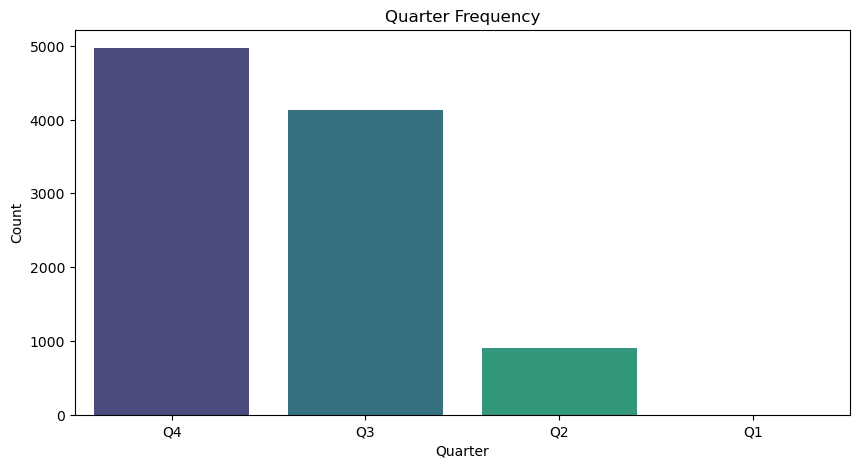

In [66]:
# Create the count plots for each feature
plt.figure(figsize=(10,5))

# Plot for Account Category
sns.countplot(data=final_df, x='quarter', palette='viridis')
plt.title('Quarter Frequency')
plt.xlabel('Quarter')
plt.ylabel('Count')

On a business standpoint, it doesn't make sense to consider neither the *'last_invoice_date_created'* nor the quarter columns. Since most of the customers are in a subscription plan, their renewals are done almost automatically. Sales Representatives have triggers being deployed whenever a customer is close to be churned. Having said that, we are dropping those columns.

In [68]:
# Drop the 'last_invoice_date_created' and 'quarter' columns in place
final_df.drop(columns=['last_invoice_date_created','quarter'], inplace=True)

In [71]:
# Compute the correlation matrix
correlation_matrix = final_df.corr()

Number of collinear pairs = 5.5


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

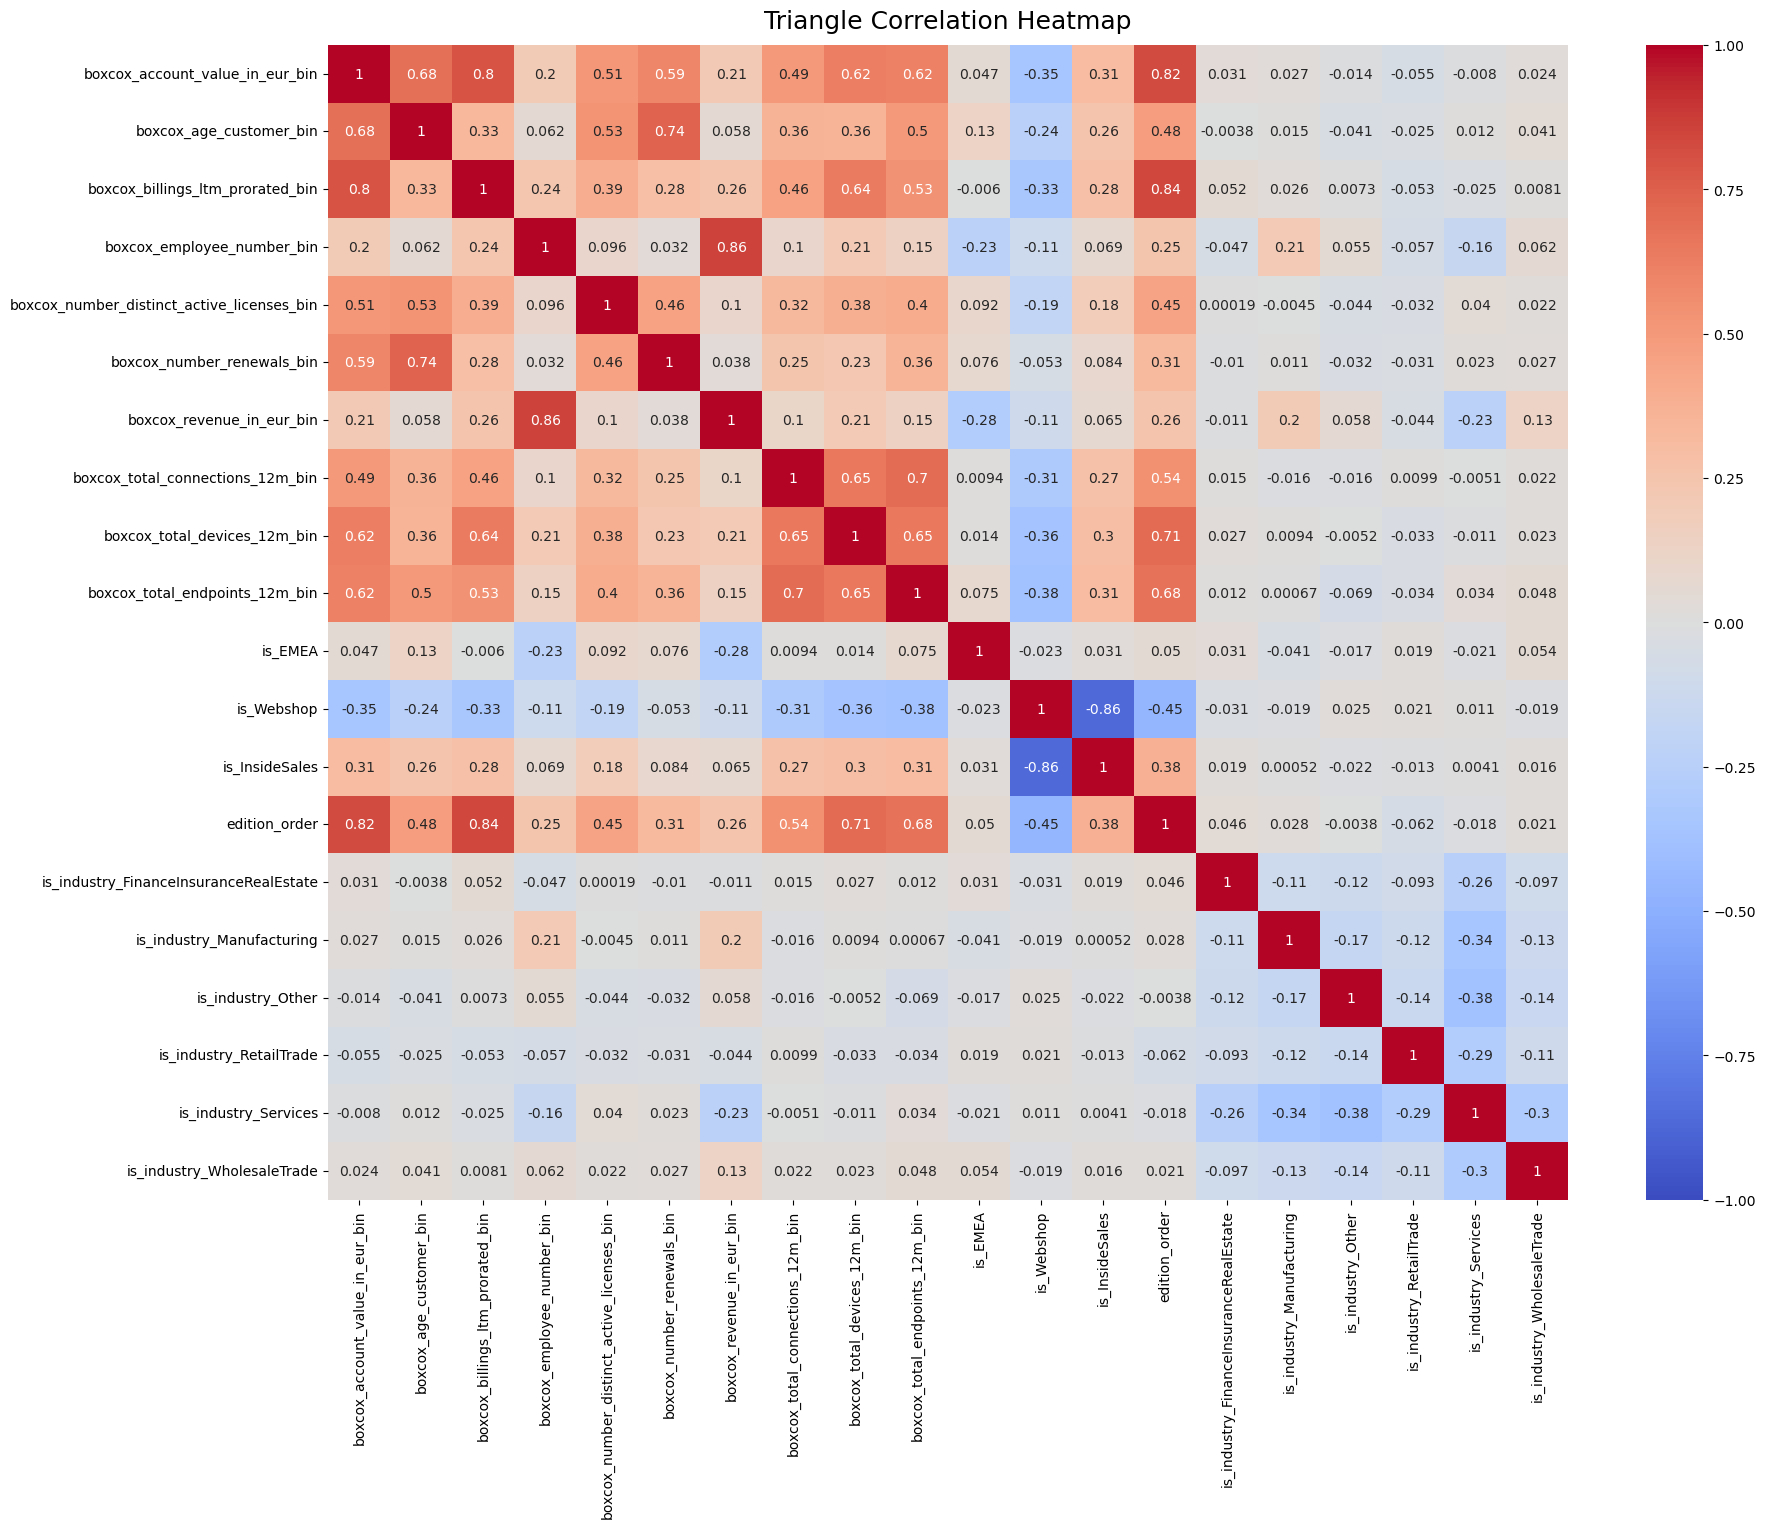

In [88]:
high_cor = correlation_matrix>0.7
num_collinear_pair = (high_cor.sum().sum()-len(final_df.columns))/2
print (f'Number of collinear pairs = {num_collinear_pair}')

# Visualize the correlation matrix
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

Pearson correlation coefficient (PCC) is a measure of collinearity that varies between -1 and 1. PCC of 0 means there is no collinearity, PCC = 1 is the strongest positive linear correlation and PCC=-1 is the strongest negative correlation. In the above correlation matrix, to identify a collinear pair we should define a minimum coefficient above which a pair is considered collinear. Here we choose 0.7 as collinearity criterion. This number is arbitrary and can be anything depending on what is considered collinearity for a given dataset but 0.7 is a good conservative minimum. As you can see, there are 70 pairs with a correlation of over 0.7. That is too much to be taken care of manually and intelligently.

**Multicollinearity**

Multicollinearity is defined as features in a dataset being linearly correlated to each other. Two collinear features are shadows of each other and do not bring in much new information beyond what either one can do alone. Multicollinearity in features is not desirable, particularly when using linear regression models. Other ML algorithms such as tree-based ones may be less prone to adverse effects of multicollinearity in terms of prediction accuracy, multicollinearity still can be harmful in terms of interpretation of the model especially when it comes to measuring feature importance.

There are three options to deal with collinear feature:

1. dropping enough features from the dataset to eliminate all collinearity
2. combinning the collinear features using a linear formula to create a new a feature
3. doing a principal component analysis (PCA) and reduce the number of features in your dataset

Cluster analysis is a distance-based method because it uses Euclidean distance (or some variant) in multidimensional space to assign objects to clusters to which they are closest. However, collinearity can become a major problem when such distance based measures are used.

Clustering analysis is not negatively affected by heteroscedasticity, but the results are negatively impacted by the multicollinearity of features/ variables used in clustering as the correlated feature/ variable will carry extra weight on the distance calculation than desired.

If you have groups of highly correlated variables it's probably best to cluster on the principal components. That allows you to incorporate the information that's not redundant while still limiting the impact of high correlations.

We will consider using PCA, here's why:

* Firstly, k-means is not badly affected by collinearity/correlations.
* Secondly, if we drop our variables in the wrong way, we'll artificially bring some samples closer together.
* Thirdly, collinerarity/correlations are not the problem, dimensionality is.